# 数据集：[Movies Dataset from Pirated Sites](https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website)

## 1. 数据分析：
### 1.1数据集介绍：
   该数据集包含来自一个盗版网站的电影数据，该网站每月有约200万访问者。该数据包含来自所有行业（如好莱坞、宝莱坞、动漫等）的20,000多部电影。数据字段包括电影的唯一ID、电影名称、电影简介和每部电影的点击次数等信息，具体将在下文进行介绍。

### 1.2 要求一览：
**（1）数据摘要:** 标称属性，给出每个可能取值的频数；数值属性，给出5数概括及缺失值的个数

**（2）数据可视化:** 使用直方图、盒图等检查数据分布及离群点


In [1]:
#需要的包和库
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from impyute import fast_knn

In [2]:
#读取数据
file_path = "./Movies Dataset from Pirated Sites/movies_dataset.csv"
data = pd.read_csv(file_path,thousands=',',dtype={'downloads':'float64','views':'float64'})
unUse = data.columns[0] #第一列是序号，不属于数据集关键词
data.drop(unUse, axis=1,inplace=True)#去掉第一列 inplace表示修改原dataframe而不是修改视图

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  float64
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  float64
 13  writer           18356 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.2+ MB


### 1.1 数据字段介绍和分类
本次处理主要针对标称属性和数值属性

0 IMDb-rating 在IMDb网站上的评分（数值）

1 appropriate_for 美国电影分级制度的等级（标称）

2 director 导演名字（标称）

3 downloads 该电影的下载次数（数值）

4 id 电影唯一的id（标称）

5 industry 工厂（标称）

6 language 语言（标称）

7 posted_date发行日期（标称）

8 release_date发布日期（标称）

9 run_time 电影时长（数值）以分钟为单位

10 storyline 简介（都不是）

11 title标题（标称）

12 views 点击量（数值属性）

13 writer 编剧（标称）

In [3]:
for column in data.columns:
    print("属性"+column+"概况如下")
    print(data[column].value_counts())
    print("-------------------------------------")

属性IMDb-rating概况如下
6.6    829
5.0    774
5.7    747
6.1    724
5.5    707
      ... 
1.5      2
9.1      1
9.9      1
9.5      1
1.3      1
Name: IMDb-rating, Length: 85, dtype: int64
-------------------------------------
属性appropriate_for概况如下
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
-------------------------------------
属性director概况如下
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                          

In [4]:
#五数概况函数
def getFiveDes(data,attr):
    print("对数值属性"+attr+"的五数概括如下")
    des = data[attr].describe()
    des_min = des['min']
    des_q1 = des['25%']
    des_median = des['50%']
    des_q3 = des['75%']
    des_max = des['max']
    print("最小值为{},第一四分位数为{},中位数为{},第三四分位数为{},最大值为{}".format(des_min,des_q1,des_median,des_q3,des_max))

In [6]:
#数据摘要 标称属性，给出每个可能取值的频数
#标称属性：分类
nominalAttr = ['appropriate_for','director','id','industry','language','posted_date','release_date','title','writer']#共9个
#列举
for nattr in nominalAttr:
    print("对于标称属性"+nattr+"的可能取值及频数分析如下")#column是字符串
    print(data[nattr].value_counts())
    print("--------------------------------------")
    
#数值属性:
numetricAttr = ['IMDb-rating','downloads','run_time','views']#4个
#从上面对整体的处理可以发现时长有xhxmin这样的格式，需要转换成数字
i = 0
tmpTime = []
for t in data['run_time']:
    realt = 0
    try:
        realt = pd.to_numeric(t)
    except:
        realt = pd.to_timedelta(t).seconds / 60
    tmpTime.append(realt)

new = DataFrame([tmpTime],index=['run_time'])#直接将a,b合并成一个列表进行传入
newTime=new.T#转置之后得到想要的结果
newTime.rename(columns={0:'run_time'},inplace=True)
data['run_time'] = newTime['run_time']

print("finish changing")# 获得时长全部为数值的df对象data
    
for numattr in numetricAttr:
    getFiveDes(data,numattr)
    #缺失值
    print("缺失值个数为{}".format(data[numattr].isnull().sum()))
    print("--------------------------------------")


对于标称属性appropriate_for的可能取值及频数分析如下
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
--------------------------------------
对于标称属性director的可能取值及频数分析如下
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis             

### 1.2 数据可视化

appropriate_for


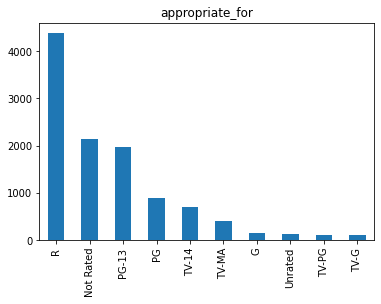

director


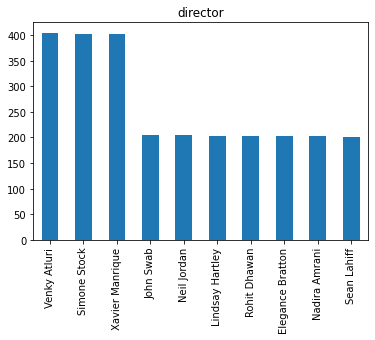

id


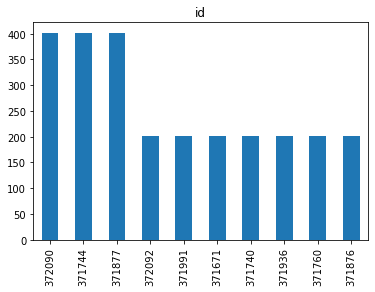

industry


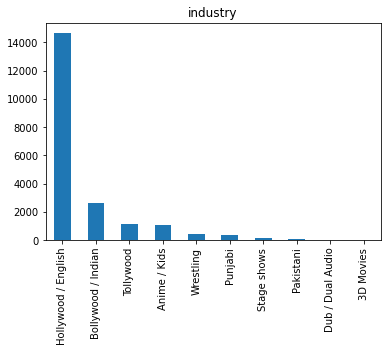

language


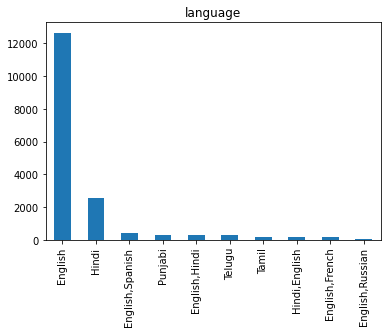

posted_date


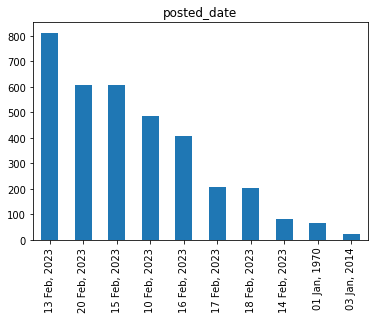

release_date


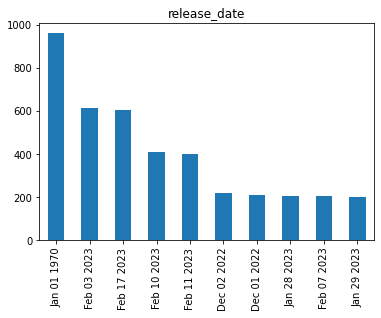

title


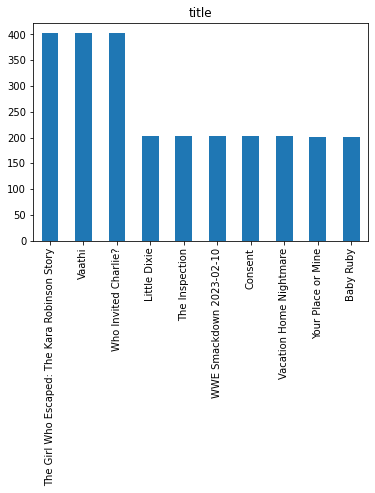

writer


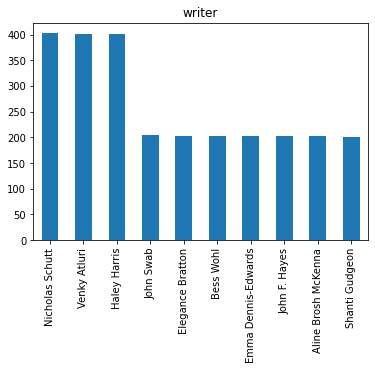

In [7]:
#使用直方图、盒图等检查数据分布及离群点
#使用条形图查看标称属性的数据分布
#为了图表的美观性和可读性，选取前10个数据
num = 10

for idx, attr in enumerate(nominalAttr):
    #plt.subplot(5,2,idx+1)
    print(attr)
    data[attr].value_counts()[:num].plot.bar(title = attr)
    plt.show()

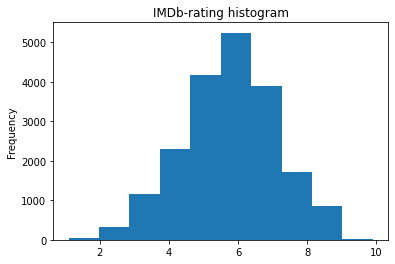

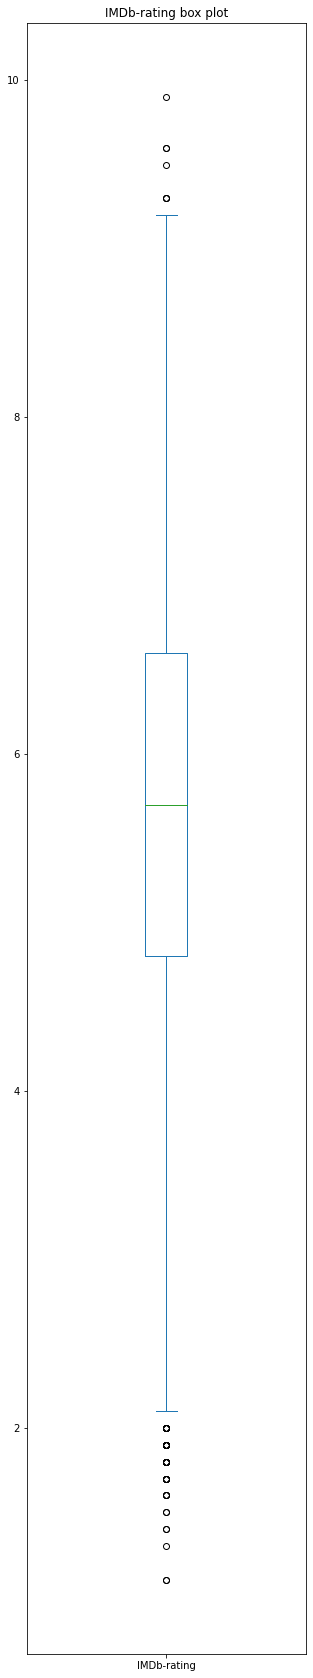

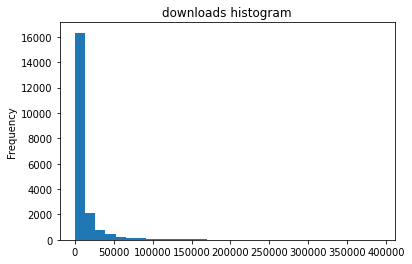

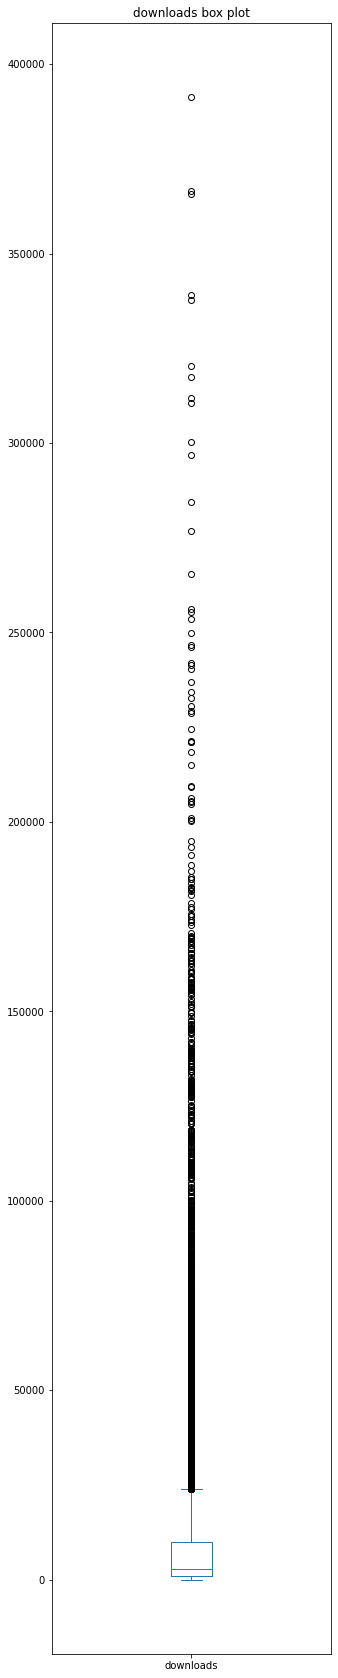

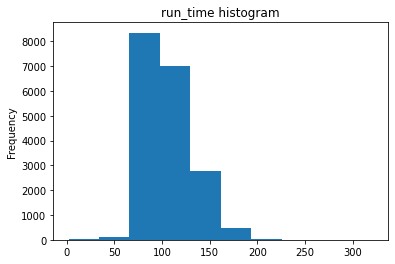

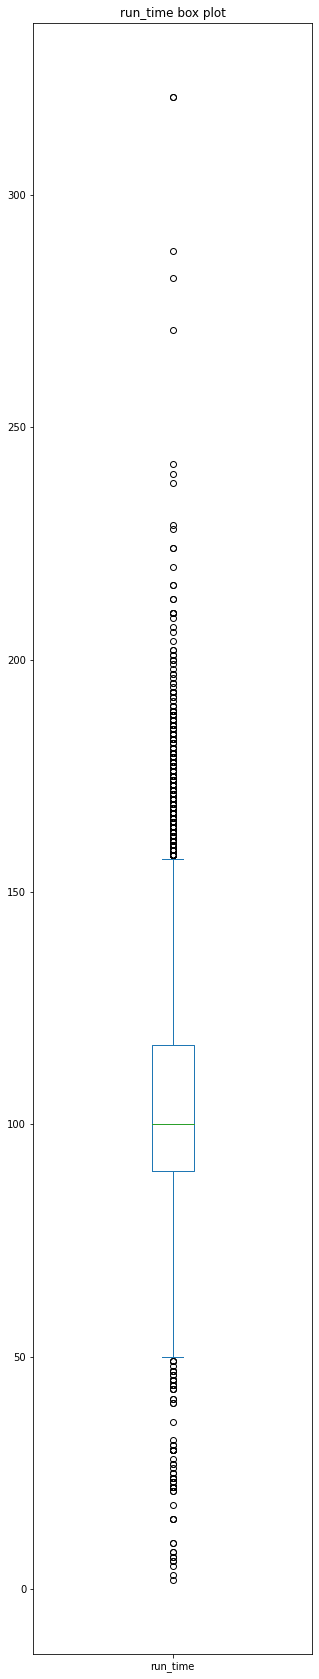

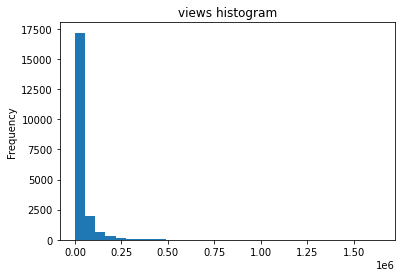

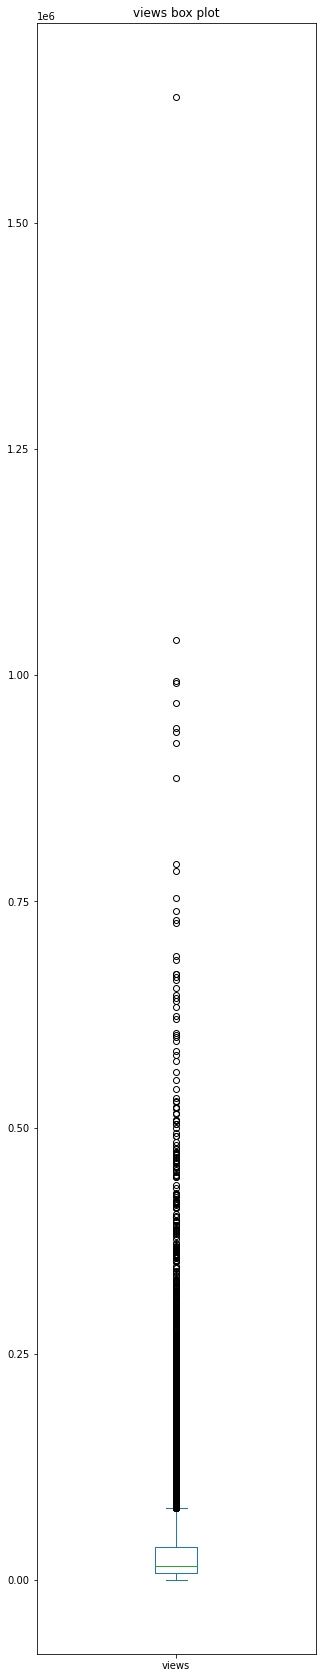

In [8]:
#使用直方图、盒图检查数据分布及离群点
for attr in numetricAttr:
    if attr == "downloads" or attr =="views":
        mybins = 30
    else:
        mybins = 10
    data[attr].plot.hist(title = attr+" histogram",bins = mybins)#直方图
    plt.show()
    data[attr].plot.box(title = attr+" box plot",figsize = (5,30))#盒图
    plt.show()

图中离散的小圆圈就是离群点,从上图可以看到views和downloads数据分布非常分散，把views<100000的和downloads<30000的值使用盒图可视化如下

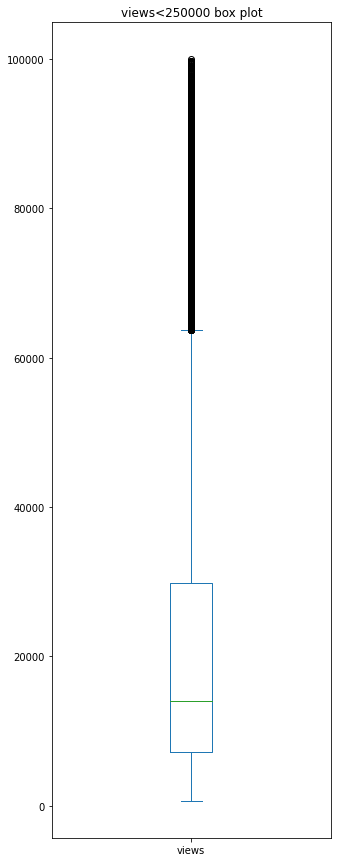

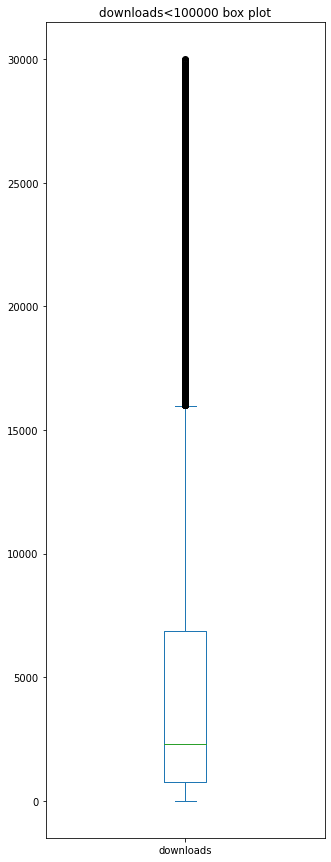

In [9]:
data[data["views"]<100000]["views"].plot.box(title = "views<250000 box plot",figsize = (5,15))
plt.show()
data[data["downloads"]<30000]["downloads"].plot.box(title = "downloads<100000 box plot",figsize = (5,15))
plt.show()

## 2. 数据缺失处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

将缺失部分剔除
用最高频率值来填补缺失值
通过属性的相关关系来填补缺失值
通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

In [10]:
print("该数据集中缺失数据情况如下所示：")
print(data.isnull().sum())

该数据集中缺失数据情况如下所示：
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64


可以发现，本数据集除了id属性外的12个属性都存在缺失值。
* downloads、posted_date、release_date、title和views属性缺失值都是1，原因应该是数据记录缺失；
* IMDb-rating是在IMDb网站上的评分，缺失可能是因为不存在，因为IMDb网站只包含大部分电影；
* appropriate_for是美国电影分级制度，缺失可能是因为难以界定；
* director是电影导演，缺失可能是未记录，也可能是涉及隐私导致不愿公开；
* language是电影采用的语言，缺失可能是因为未记录；
* run_time是电影时长，缺失是因为未记录；
* storyline是电影简介，缺失可能是未记录或不存在；
* writer是电影编剧，缺失可能是未记录，也可能是涉及隐私导致不愿公开。

### 2.1 数据剔除

In [19]:
def compare_dataset_nominal(befDs,aftDs,nominalAttr,num):
    for attr in nominalAttr:
        plt.subplot(1,2,1)
        befDs[attr].value_counts()[:num].plot.bar(title = attr+" before handle",figsize=(12,10))
        plt.subplot(1,2,2)
        aftDs[attr].value_counts()[:num].plot.bar(title = attr+" after handle",figsize = (12,10))
        plt.show()
        print("属性{}处理前频数位于前{}的值如下所示".format(attr,num))
        print(befDs[attr].value_counts()[:num])
        print("属性{}处理后频数位于前{}的值如下所示".format(attr,num))
        print(aftDs[attr].value_counts()[:num])
    
def compare_dataset_numetric(befDs,aftDs,numetricAttr,bin1 = 30,bin2 = 10,ifbox = False):
    for attr in numetricAttr:
        if attr == "downloads" or attr =="views":
            mybins = bin1
        else:
            mybins = bin2
        if ifbox:
            plt.subplot(2,2,1)
            befDs[attr].plot.hist(title = attr+" histogram before handle",bins = mybins,figsize=(12,30),color='r')#直方图
            plt.subplot(2,2,2)
            aftDs[attr].plot.hist(title = attr+ " histogram after handle",bins = mybins,figsize=(12,30),color ='r')
            plt.subplot(2,2,3)
            befDs[attr].plot.box(title = attr+" box plot",figsize = (12,30))#盒图
            plt.subplot(2,2,4)
            aftDs[attr].plot.box(title = attr+" box plot",figsize = (12,30))
            plt.show()
        else:
            plt.subplot(1,2,1)
            befDs[attr].plot.hist(title = attr+" histogram before handle",bins = mybins,figsize=(12,10),color='r')#直方图
            plt.subplot(1,2,2)
            aftDs[attr].plot.hist(title = attr+ "histogram after handle",bins = mybins,figsize=(12,10),color ='r')
            plt.show()
        print("属性{}处理前五数概括如下所示".format(attr))
        getFiveDes(befDs,attr)
        print("属性{}处理后五数概括如下所示".format(attr))
        getFiveDes(aftDs,attr) 

def compare_dataset(befDs,aftDs):
    print("开始对比标称属性")
    num = 10
    compare_dataset_nominal(befDs,aftDs,nominalAttr,num)

    print("开始对比数值属性")
    compare_dataset_numetric(befDs,aftDs,numetricAttr,30,10)

开始对比标称属性


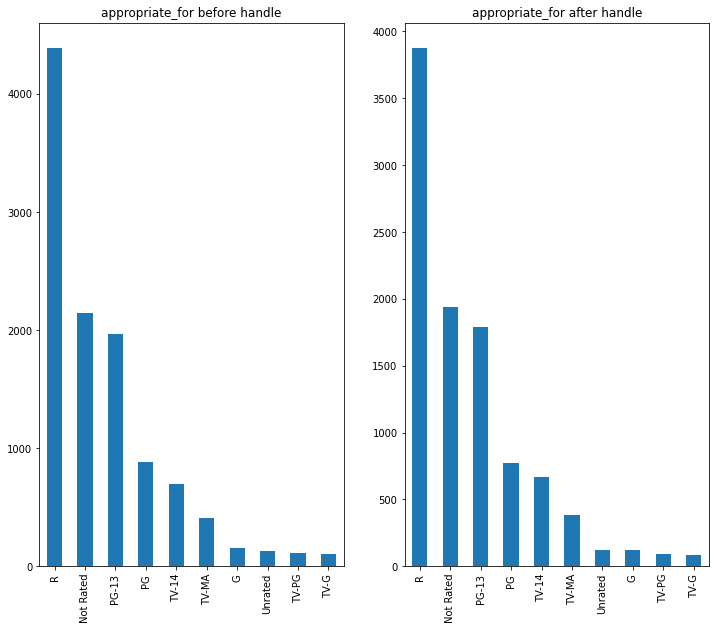

属性appropriate_for处理前频数位于前10的值如下所示
R            4384
Not Rated    2142
PG-13        1968
PG            886
TV-14         694
TV-MA         406
G             152
Unrated       132
TV-PG         115
TV-G           99
Name: appropriate_for, dtype: int64
属性appropriate_for处理后频数位于前10的值如下所示
R            3873
Not Rated    1938
PG-13        1787
PG            771
TV-14         664
TV-MA         384
Unrated       122
G             120
TV-PG          88
TV-G           85
Name: appropriate_for, dtype: int64


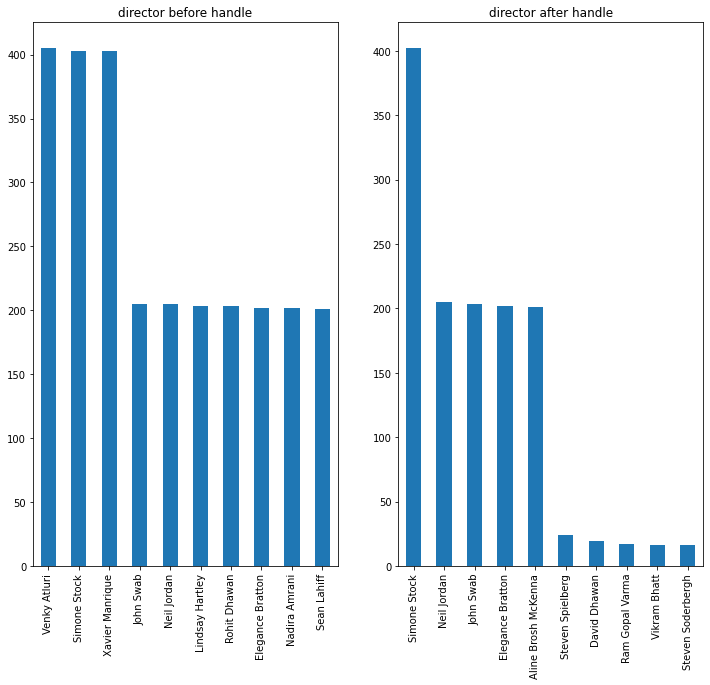

属性director处理前频数位于前10的值如下所示
Venky Atluri        405
Simone Stock        403
Xavier Manrique     403
John Swab           205
Neil Jordan         205
Lindsay Hartley     203
Rohit Dhawan        203
Elegance Bratton    202
Nadira Amrani       202
Sean Lahiff         201
Name: director, dtype: int64
属性director处理后频数位于前10的值如下所示
Simone Stock           402
Neil Jordan            205
John Swab              203
Elegance Bratton       202
Aline Brosh McKenna    201
Steven Spielberg        24
David Dhawan            19
Ram Gopal Varma         17
Vikram Bhatt            16
Steven Soderbergh       16
Name: director, dtype: int64


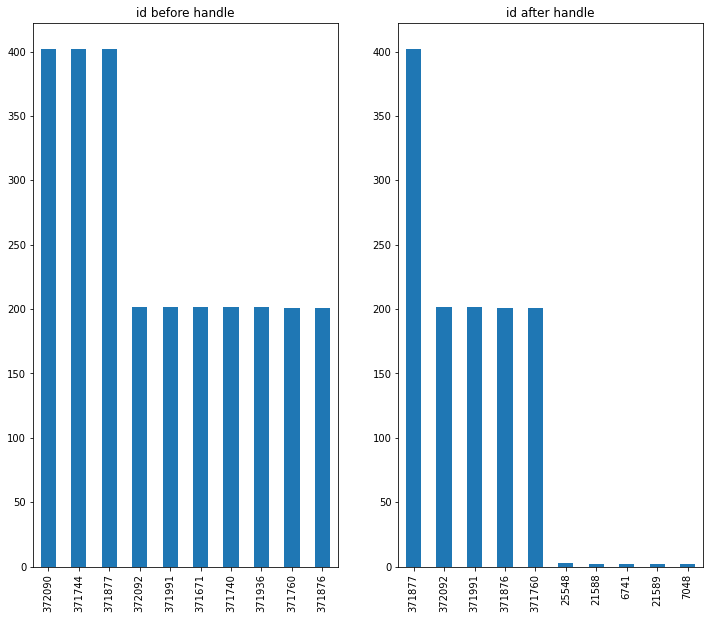

属性id处理前频数位于前10的值如下所示
372090    402
371744    402
371877    402
372092    202
371991    202
371671    202
371740    202
371936    202
371760    201
371876    201
Name: id, dtype: int64
属性id处理后频数位于前10的值如下所示
371877    402
372092    202
371991    202
371876    201
371760    201
25548       3
21588       2
6741        2
21589       2
7048        2
Name: id, dtype: int64


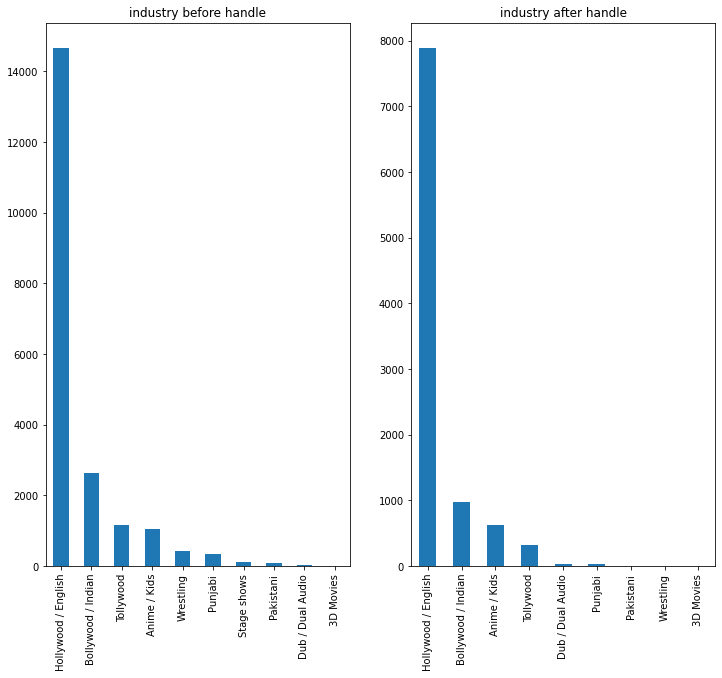

属性industry处理前频数位于前10的值如下所示
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64
属性industry处理后频数位于前10的值如下所示
Hollywood / English    7880
Bollywood / Indian      983
Anime / Kids            634
Tollywood               320
Dub / Dual Audio         38
Punjabi                  36
Pakistani                 9
Wrestling                 1
3D Movies                 1
Name: industry, dtype: int64


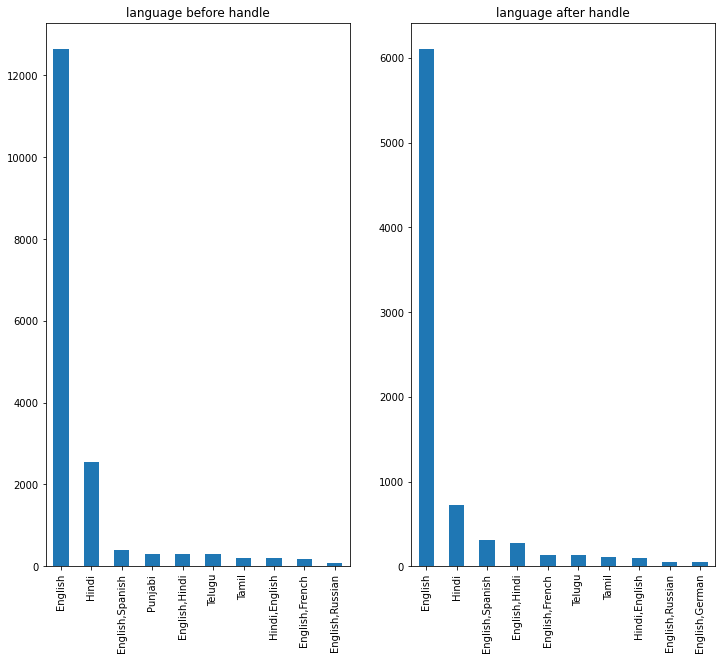

属性language处理前频数位于前10的值如下所示
English            12657
Hindi               2558
English,Spanish      391
Punjabi              310
English,Hindi        304
Telugu               298
Tamil                198
Hindi,English        191
English,French       174
English,Russian       71
Name: language, dtype: int64
属性language处理后频数位于前10的值如下所示
English            6110
Hindi               724
English,Spanish     312
English,Hindi       270
English,French      133
Telugu              132
Tamil               109
Hindi,English       102
English,Russian      56
English,German       50
Name: language, dtype: int64


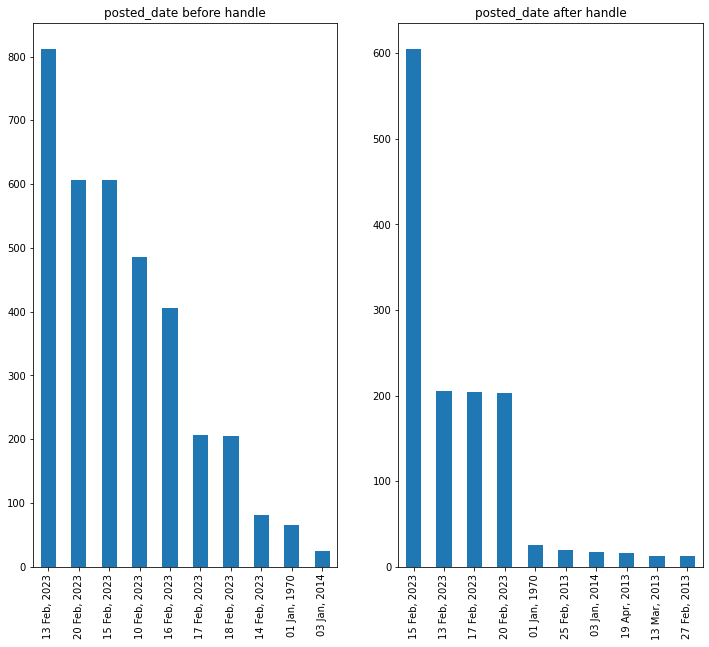

属性posted_date处理前频数位于前10的值如下所示
13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
17 Feb, 2023    206
18 Feb, 2023    205
14 Feb, 2023     81
01 Jan, 1970     65
03 Jan, 2014     24
Name: posted_date, dtype: int64
属性posted_date处理后频数位于前10的值如下所示
15 Feb, 2023    605
13 Feb, 2023    205
17 Feb, 2023    204
20 Feb, 2023    203
01 Jan, 1970     25
25 Feb, 2013     20
03 Jan, 2014     17
19 Apr, 2013     16
13 Mar, 2013     13
27 Feb, 2013     12
Name: posted_date, dtype: int64


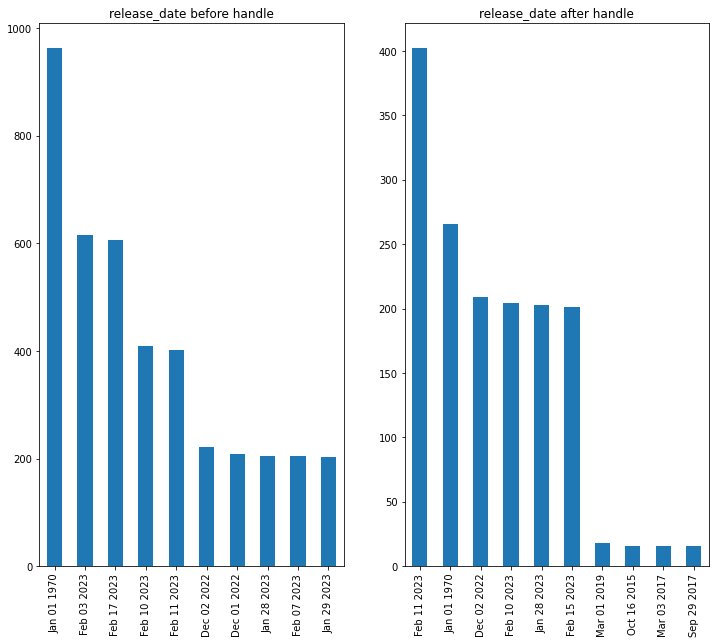

属性release_date处理前频数位于前10的值如下所示
Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
Dec 02 2022    221
Dec 01 2022    208
Jan 28 2023    205
Feb 07 2023    204
Jan 29 2023    202
Name: release_date, dtype: int64
属性release_date处理后频数位于前10的值如下所示
Feb 11 2023    402
Jan 01 1970    266
Dec 02 2022    209
Feb 10 2023    204
Jan 28 2023    203
Feb 15 2023    201
Mar 01 2019     18
Oct 16 2015     16
Mar 03 2017     16
Sep 29 2017     16
Name: release_date, dtype: int64


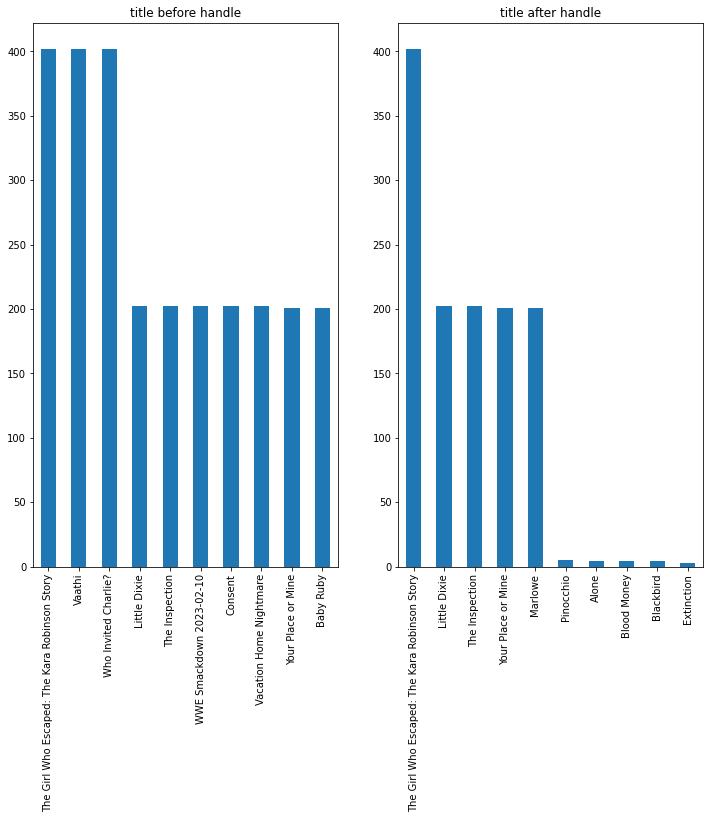

属性title处理前频数位于前10的值如下所示
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
WWE Smackdown 2023-02-10                         202
Consent                                          202
Vacation Home Nightmare                          202
Your Place or Mine                               201
Baby Ruby                                        201
Name: title, dtype: int64
属性title处理后频数位于前10的值如下所示
The Girl Who Escaped: The Kara Robinson Story    402
Little Dixie                                     202
The Inspection                                   202
Your Place or Mine                               201
Marlowe                                          201
Pinocchio                                          5
Alone                                              4
Blood Money              

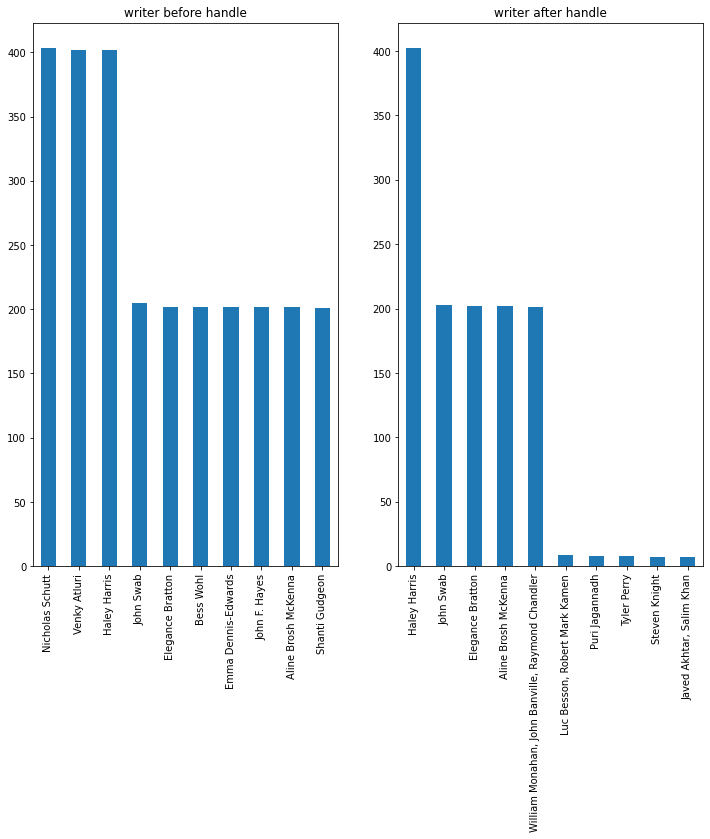

属性writer处理前频数位于前10的值如下所示
Nicholas Schutt        403
Venky Atluri           402
Haley Harris           402
John Swab              205
Elegance Bratton       202
Bess Wohl              202
Emma Dennis-Edwards    202
John F. Hayes          202
Aline Brosh McKenna    202
Shanti Gudgeon         201
Name: writer, dtype: int64
属性writer处理后频数位于前10的值如下所示
Haley Harris                                        402
John Swab                                           203
Elegance Bratton                                    202
Aline Brosh McKenna                                 202
William Monahan, John Banville, Raymond Chandler    201
Luc Besson, Robert Mark Kamen                         9
Puri Jagannadh                                        8
Tyler Perry                                           8
Steven Knight                                         7
Javed Akhtar, Salim Khan                              7
Name: writer, dtype: int64
开始对比数值属性


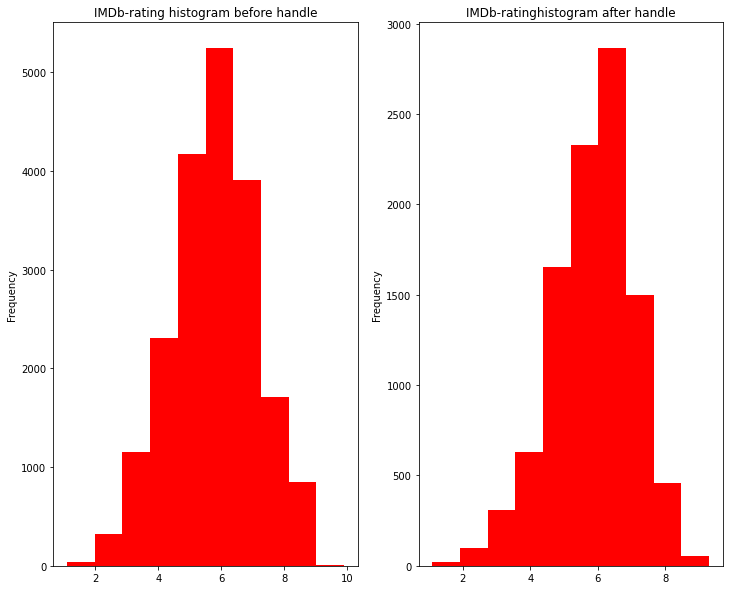

属性IMDb-rating处理前五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.8,中位数为5.7,第三四分位数为6.6,最大值为9.9
属性IMDb-rating处理后五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为5.2,中位数为6.0,第三四分位数为6.675,最大值为9.3


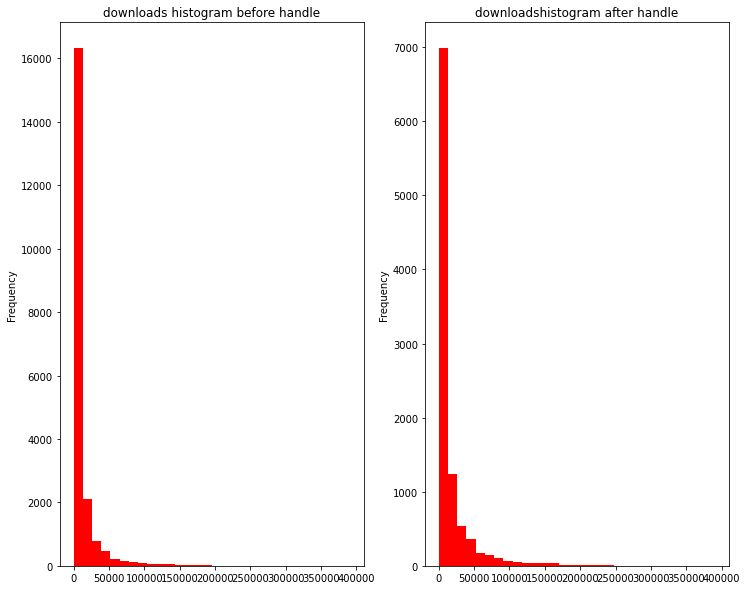

属性downloads处理前五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为855.5,中位数为2716.0,第三四分位数为10070.0,最大值为391272.0
属性downloads处理后五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为1340.25,中位数为4473.0,第三四分位数为16538.5,最大值为391272.0


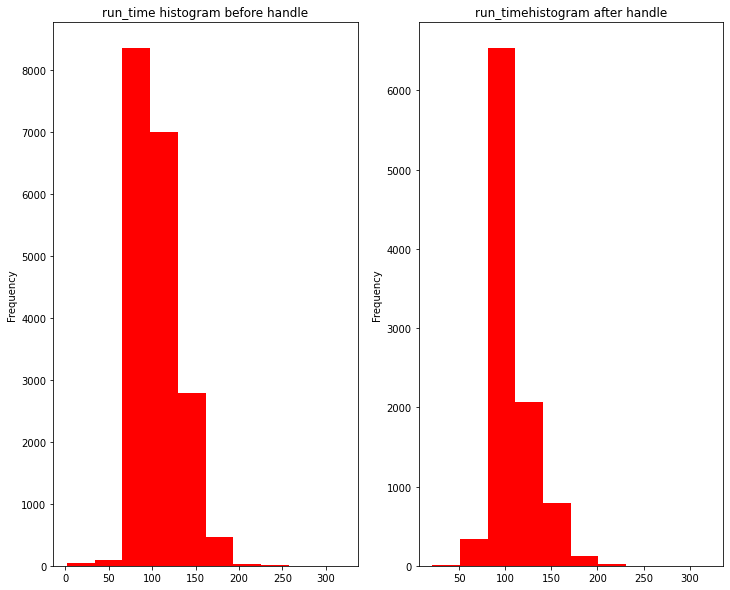

属性run_time处理前五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为100.0,第三四分位数为117.0,最大值为321.0
属性run_time处理后五数概括如下所示
对数值属性run_time的五数概括如下
最小值为21.0,第一四分位数为91.0,中位数为101.0,第三四分位数为116.0,最大值为321.0


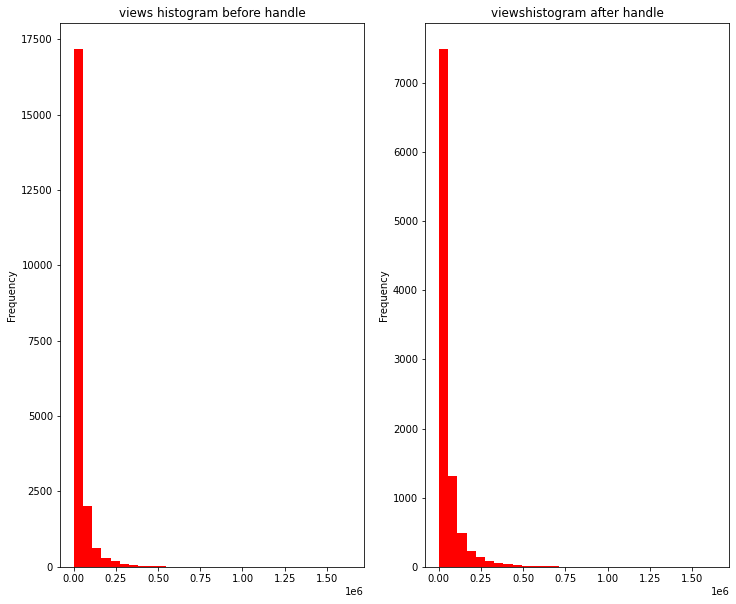

属性views处理前五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.5,中位数为15222.0,第三四分位数为36571.0,最大值为1638533.0
属性views处理后五数概括如下所示
对数值属性views的五数概括如下
最小值为1002.0,第一四分位数为10234.5,中位数为22258.0,第三四分位数为54012.25,最大值为1638533.0


In [20]:
#将缺失部分剔除，得到新数据集并对比新旧数据集的差异
new1 = data.dropna(how = "any")
#可视化对比新旧数据集，标称属性用条形图，数值属性用直方图
compare_dataset(data,new1)
    

如果样本缺失某一项就剔除该样本会对数据分析产生较大影响，如标称属性中的director、id，如对数值属性分布的影响等等。

### 2.2 用最高频率值填补缺失值

开始对比标称属性


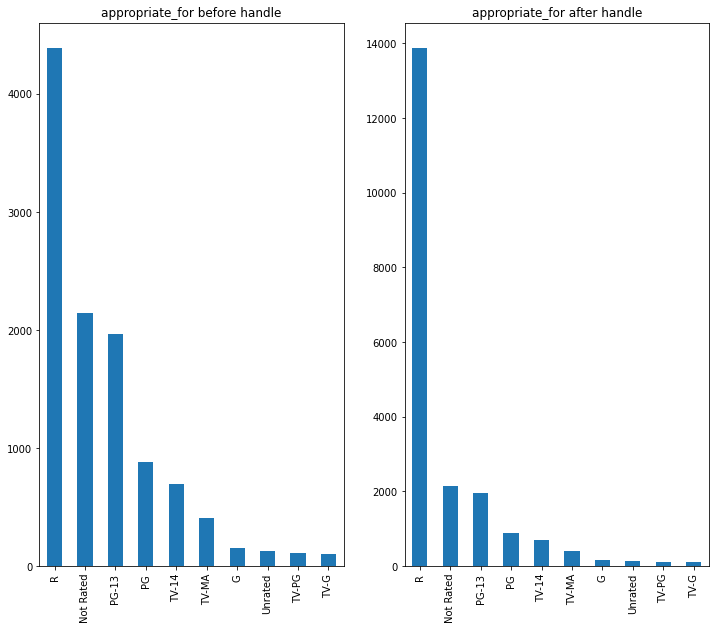

属性appropriate_for处理前频数位于前10的值如下所示
R            4384
Not Rated    2142
PG-13        1968
PG            886
TV-14         694
TV-MA         406
G             152
Unrated       132
TV-PG         115
TV-G           99
Name: appropriate_for, dtype: int64
属性appropriate_for处理后频数位于前10的值如下所示
R            13860
Not Rated     2142
PG-13         1968
PG             886
TV-14          694
TV-MA          406
G              152
Unrated        132
TV-PG          115
TV-G            99
Name: appropriate_for, dtype: int64


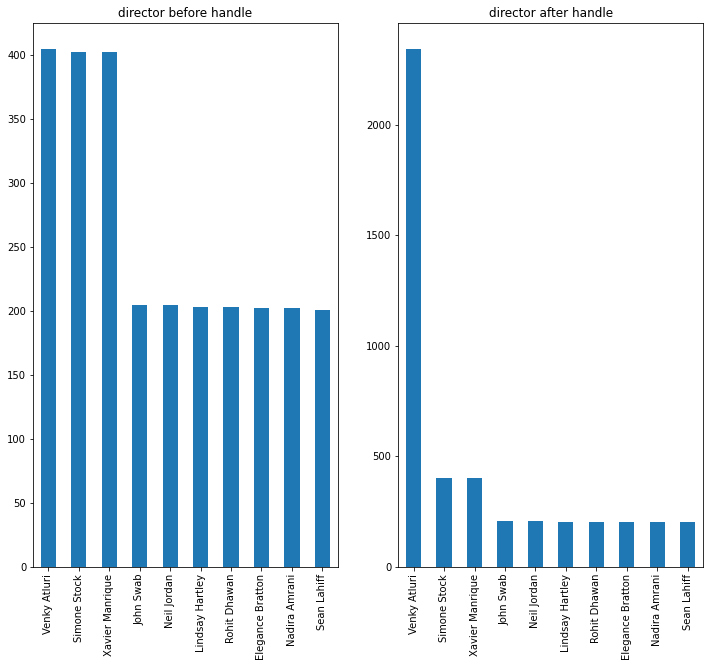

属性director处理前频数位于前10的值如下所示
Venky Atluri        405
Simone Stock        403
Xavier Manrique     403
John Swab           205
Neil Jordan         205
Lindsay Hartley     203
Rohit Dhawan        203
Elegance Bratton    202
Nadira Amrani       202
Sean Lahiff         201
Name: director, dtype: int64
属性director处理后频数位于前10的值如下所示
Venky Atluri        2343
Simone Stock         403
Xavier Manrique      403
John Swab            205
Neil Jordan          205
Lindsay Hartley      203
Rohit Dhawan         203
Elegance Bratton     202
Nadira Amrani        202
Sean Lahiff          201
Name: director, dtype: int64


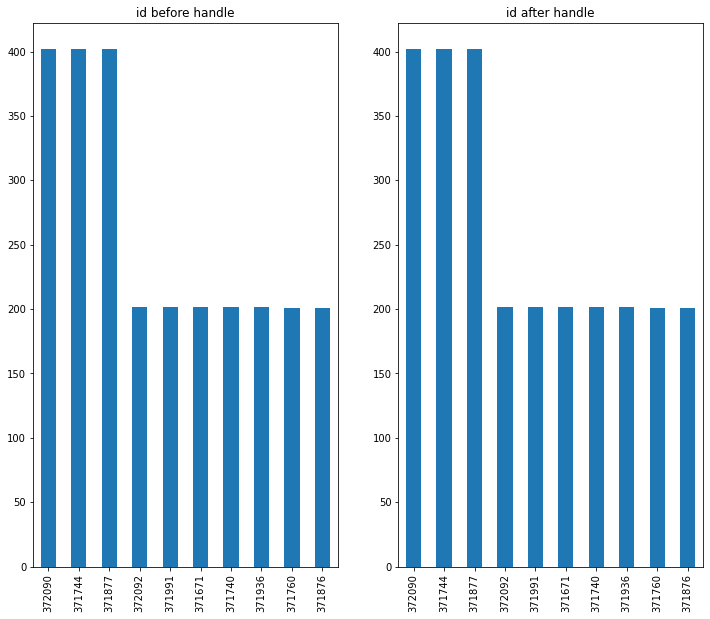

属性id处理前频数位于前10的值如下所示
372090    402
371744    402
371877    402
372092    202
371991    202
371671    202
371740    202
371936    202
371760    201
371876    201
Name: id, dtype: int64
属性id处理后频数位于前10的值如下所示
372090    402
371744    402
371877    402
372092    202
371991    202
371671    202
371740    202
371936    202
371760    201
371876    201
Name: id, dtype: int64


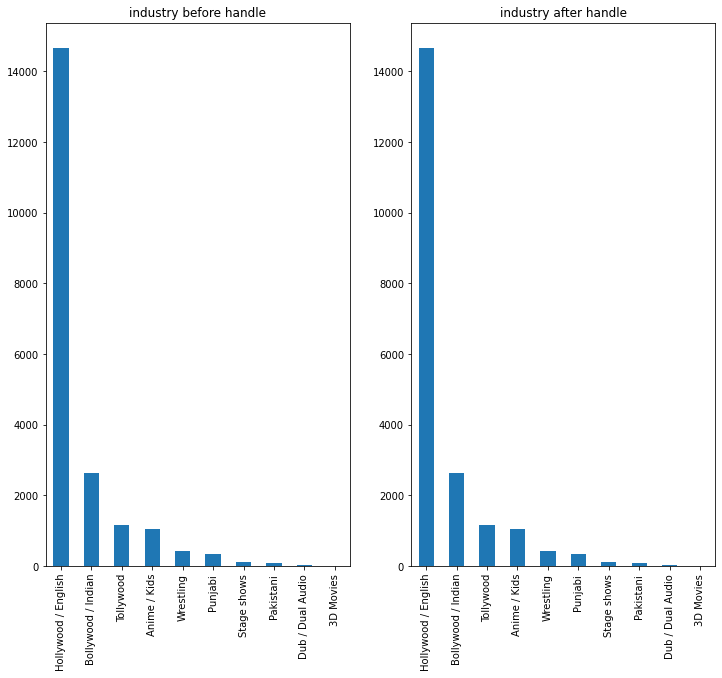

属性industry处理前频数位于前10的值如下所示
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64
属性industry处理后频数位于前10的值如下所示
Hollywood / English    14650
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64


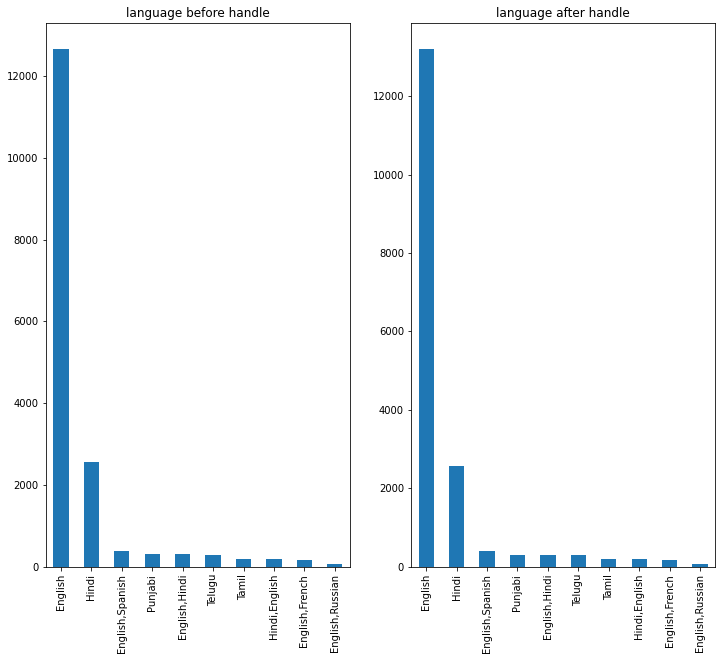

属性language处理前频数位于前10的值如下所示
English            12657
Hindi               2558
English,Spanish      391
Punjabi              310
English,Hindi        304
Telugu               298
Tamil                198
Hindi,English        191
English,French       174
English,Russian       71
Name: language, dtype: int64
属性language处理后频数位于前10的值如下所示
English            13199
Hindi               2558
English,Spanish      391
Punjabi              310
English,Hindi        304
Telugu               298
Tamil                198
Hindi,English        191
English,French       174
English,Russian       71
Name: language, dtype: int64


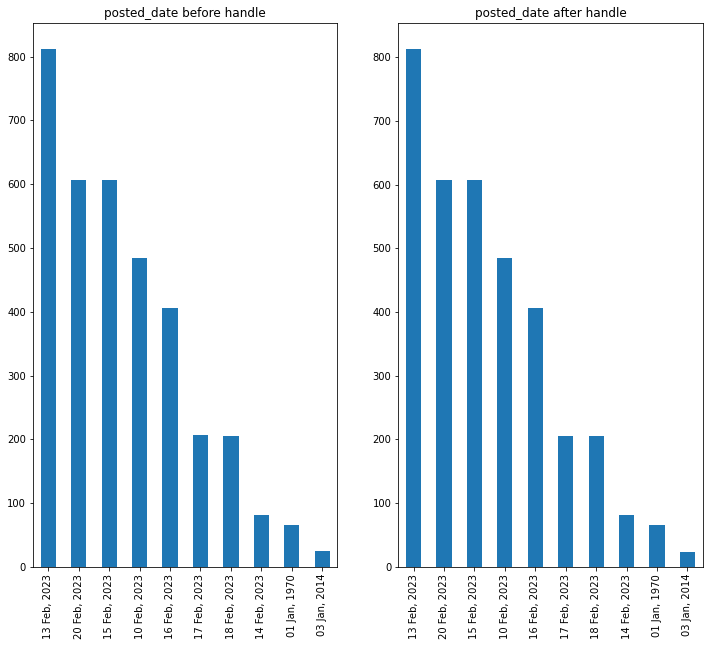

属性posted_date处理前频数位于前10的值如下所示
13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
17 Feb, 2023    206
18 Feb, 2023    205
14 Feb, 2023     81
01 Jan, 1970     65
03 Jan, 2014     24
Name: posted_date, dtype: int64
属性posted_date处理后频数位于前10的值如下所示
13 Feb, 2023    813
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
17 Feb, 2023    206
18 Feb, 2023    205
14 Feb, 2023     81
01 Jan, 1970     65
03 Jan, 2014     24
Name: posted_date, dtype: int64


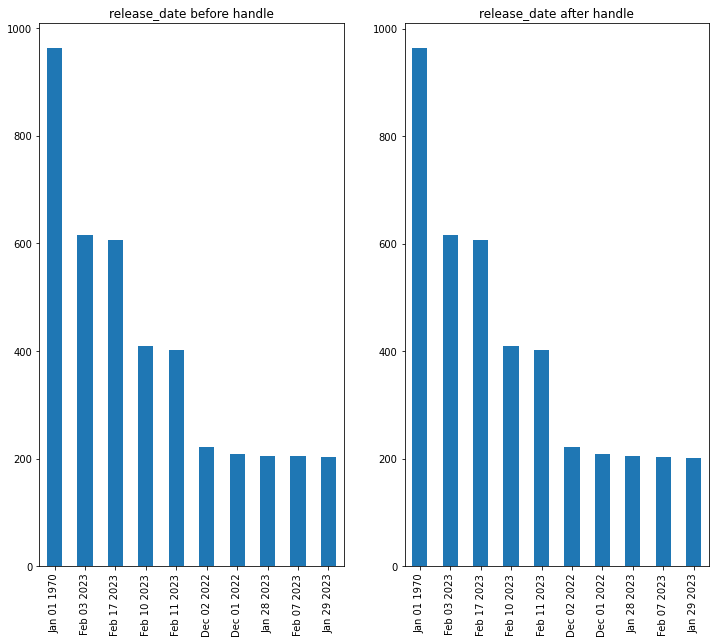

属性release_date处理前频数位于前10的值如下所示
Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
Dec 02 2022    221
Dec 01 2022    208
Jan 28 2023    205
Feb 07 2023    204
Jan 29 2023    202
Name: release_date, dtype: int64
属性release_date处理后频数位于前10的值如下所示
Jan 01 1970    963
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
Dec 02 2022    221
Dec 01 2022    208
Jan 28 2023    205
Feb 07 2023    204
Jan 29 2023    202
Name: release_date, dtype: int64


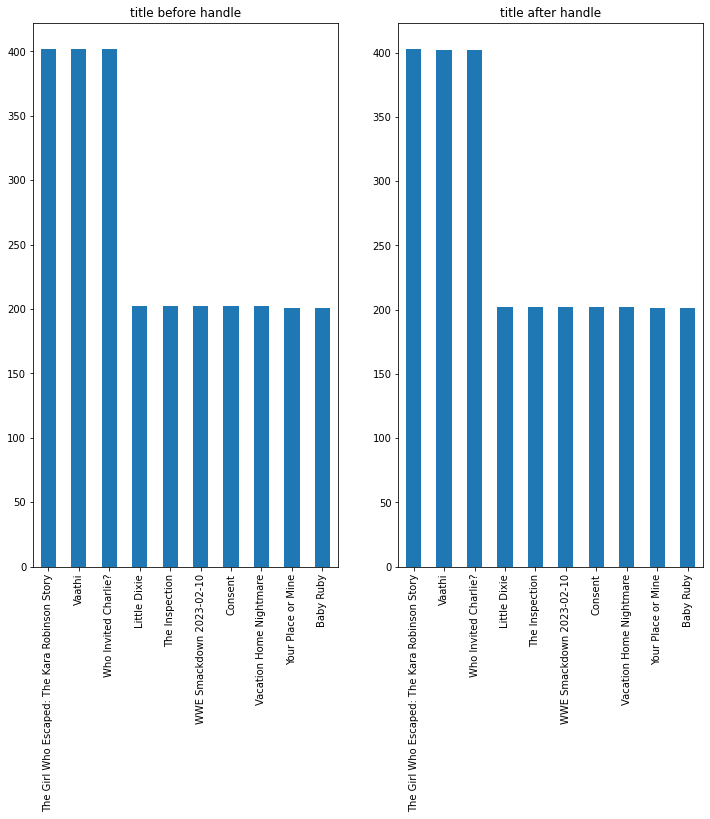

属性title处理前频数位于前10的值如下所示
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
WWE Smackdown 2023-02-10                         202
Consent                                          202
Vacation Home Nightmare                          202
Your Place or Mine                               201
Baby Ruby                                        201
Name: title, dtype: int64
属性title处理后频数位于前10的值如下所示
The Girl Who Escaped: The Kara Robinson Story    403
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
WWE Smackdown 2023-02-10                         202
Consent                                          202
Vacation Home Nightmare  

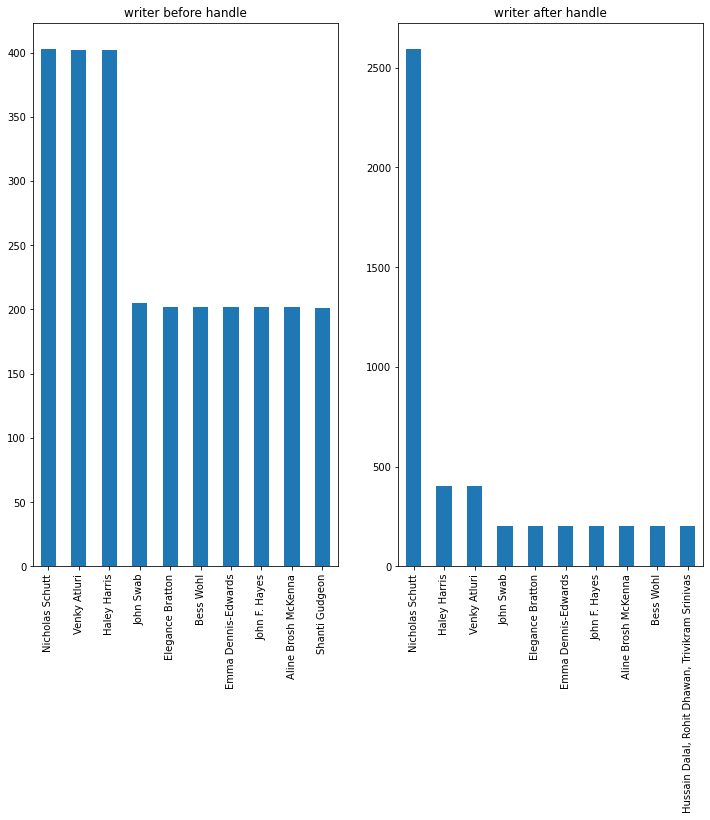

属性writer处理前频数位于前10的值如下所示
Nicholas Schutt        403
Venky Atluri           402
Haley Harris           402
John Swab              205
Elegance Bratton       202
Bess Wohl              202
Emma Dennis-Edwards    202
John F. Hayes          202
Aline Brosh McKenna    202
Shanti Gudgeon         201
Name: writer, dtype: int64
属性writer处理后频数位于前10的值如下所示
Nicholas Schutt                                    2595
Haley Harris                                        402
Venky Atluri                                        402
John Swab                                           205
Elegance Bratton                                    202
Emma Dennis-Edwards                                 202
John F. Hayes                                       202
Aline Brosh McKenna                                 202
Bess Wohl                                           202
Hussain Dalal, Rohit Dhawan, Trivikram Srinivas     201
Name: writer, dtype: int64
开始对比数值属性


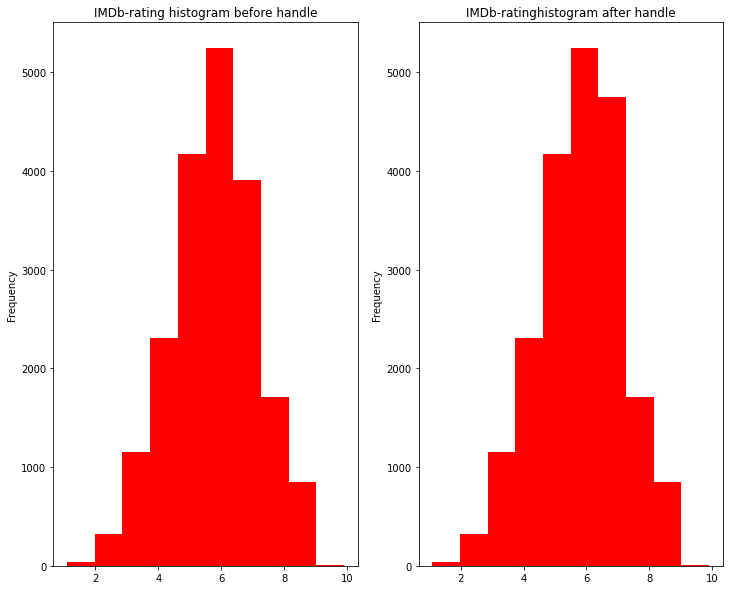

属性IMDb-rating处理前五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.8,中位数为5.7,第三四分位数为6.6,最大值为9.9
属性IMDb-rating处理后五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.9,中位数为5.8,第三四分位数为6.6,最大值为9.9


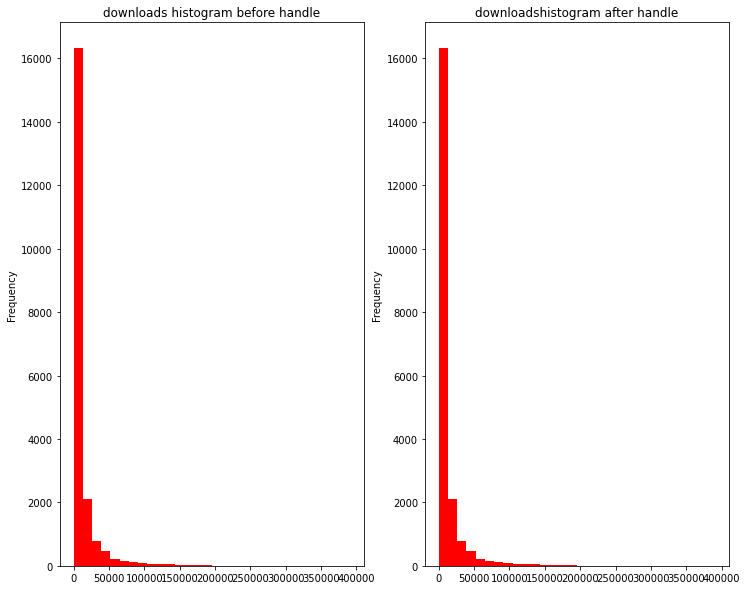

属性downloads处理前五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为855.5,中位数为2716.0,第三四分位数为10070.0,最大值为391272.0
属性downloads处理后五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为854.75,中位数为2716.0,第三四分位数为10069.5,最大值为391272.0


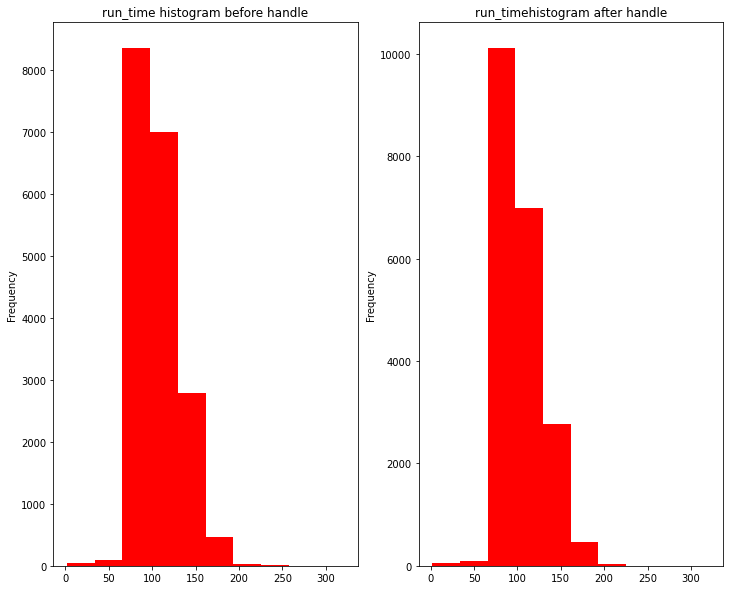

属性run_time处理前五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为100.0,第三四分位数为117.0,最大值为321.0
属性run_time处理后五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为98.0,第三四分位数为114.0,最大值为321.0


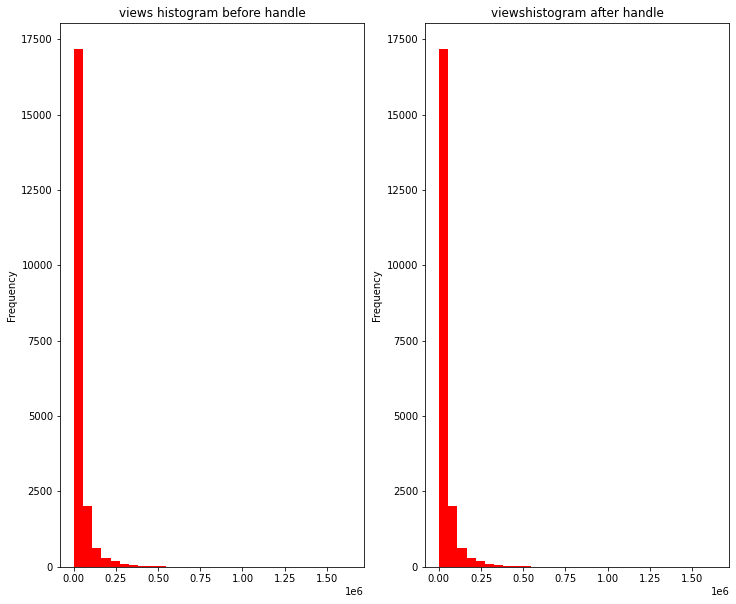

属性views处理前五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.5,中位数为15222.0,第三四分位数为36571.0,最大值为1638533.0
属性views处理后五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.0,中位数为15221.5,第三四分位数为36569.5,最大值为1638533.0


In [13]:
#即用众数填补缺失
maxFre = data.mode().iloc[0]
new2 = data.fillna(maxFre)
compare_dataset(data,new2)


可以看出，用众数进行填补不会影响数据分布，但会对五数概况产生较小的影响，由此可见用众数补充标称属性缺失值是个比较好的方法，对于该数据集来说，用最高频率值填补缺失值是较好的考量。

### 2.3 通过属性的相关关系来填补缺失值
计算属性间的相关性再决定用什么方法

In [21]:
print(numetricAttr)#有四个['IMDb-rating', 'downloads', 'run_time', 'views']
#计算下属性间的相关性
score = {}
for attr in numetricAttr:
    for subattr in numetricAttr:
        if subattr == attr:
            continue
        else:
            tmpscore = data[attr].corr(data[subattr])
            score[subattr]=tmpscore
            #print(attr,subattr,tmpscore)
    sorted_score = sorted(score.items(), key=lambda x:x[1], reverse=True)
    first_item = next(iter(sorted_score))
    print("与属性{}最相关的是属性{},相关系数为{}".format(attr,first_item[0],first_item[1]))

['IMDb-rating', 'downloads', 'run_time', 'views']
与属性IMDb-rating最相关的是属性run_time,相关系数为0.3339740378141293
与属性downloads最相关的是属性views,相关系数为0.9478768463421988
与属性run_time最相关的是属性downloads,相关系数为0.34814683691754766
与属性views最相关的是属性downloads,相关系数为0.9478768463421987


可以看出，这四个属性可以通过相关关系进行缺失值填补，其中downloads和views的相关性非常强，达到了0.948；由于每个属性都存在缺失值，所以从缺失个数最少的开始填充

In [22]:
symnull = {}
for attr in numetricAttr:
    tmpnull = data[attr].isnull().sum()
    symnull[attr] = tmpnull
sorted_null = sorted(symnull.items(),key=lambda x:x[1])#按照缺失个数从小到大排序，也是扔进随机森林的顺序
print(sorted_null)

new3 = data.copy()
for idx, pair in enumerate(sorted_null):
    attr = pair[0]
    print("预测属性{}".format(attr))
    numetric_val = new3[numetricAttr]
    known = numetric_val[numetric_val[attr].notnull()]#已知该特征的样本
    #print(known)
    unknown = numetric_val[numetric_val[attr].isnull()]
    y_train = known[attr].values
    #print(y_train)
    #print(known.loc[:,known.columns!=attr])
    x_train = known.loc[:,known.columns != attr].fillna(0).values
    #用0补上缺失值
    x_test = unknown.loc[:,unknown.columns !=attr].fillna(0).values
    rfr = RandomForestRegressor(random_state=0, n_estimators=200)
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    print(pred)
    new3.loc[(new3[attr].isnull()),attr] = pred


[('downloads', 1), ('views', 1), ('IMDb-rating', 841), ('run_time', 1768)]
预测属性downloads
[111.93]
预测属性views
[3405.43]
预测属性IMDb-rating
[6.419  5.709  4.5965 4.4515 5.4955 5.196  6.528  4.7395 4.9995 5.058
 4.6985 4.196  4.6585 4.9895 5.092  5.6115 5.122  5.411  5.3785 5.1105
 4.4555 4.9995 5.0395 6.356  4.7415 5.101  5.436  4.7415 5.1005 5.1455
 4.8975 5.5305 6.5045 5.263  5.3135 4.495  4.279  5.4105 4.512  5.7535
 4.6195 6.2075 4.881  4.284  5.099  4.236  4.4815 4.6675 4.8405 4.4265
 4.195  4.766  5.1045 5.292  5.986  5.415  4.8915 4.54   4.195  5.2295
 5.6275 4.5735 4.562  4.9935 5.426  4.747  4.347  4.8985 5.6375 4.4315
 4.9355 4.9155 4.7715 5.529  5.4035 6.0585 4.5545 5.2345 4.243  5.564
 5.631  4.5185 4.612  5.209  4.255  4.9865 6.0735 4.5565 5.7785 5.69
 6.1535 5.95   5.9795 5.6275 4.56   5.6525 4.671  5.496  5.3165 5.805
 4.329  5.8225 5.706  5.1715 5.231  5.679  5.1295 4.8425 5.5565 5.283
 4.2745 5.654  6.263  5.9505 6.1075 5.6025 5.5935 4.38   6.1785 5.5965
 5.6575 4.809  4.967

使用随机森林法填充缺失值之前:
IMDb-rating     841
downloads         1
run_time       1768
views             1
dtype: int64
使用随机森林法填充缺失值之后:
IMDb-rating    0
downloads      0
run_time       0
views          0
dtype: int64


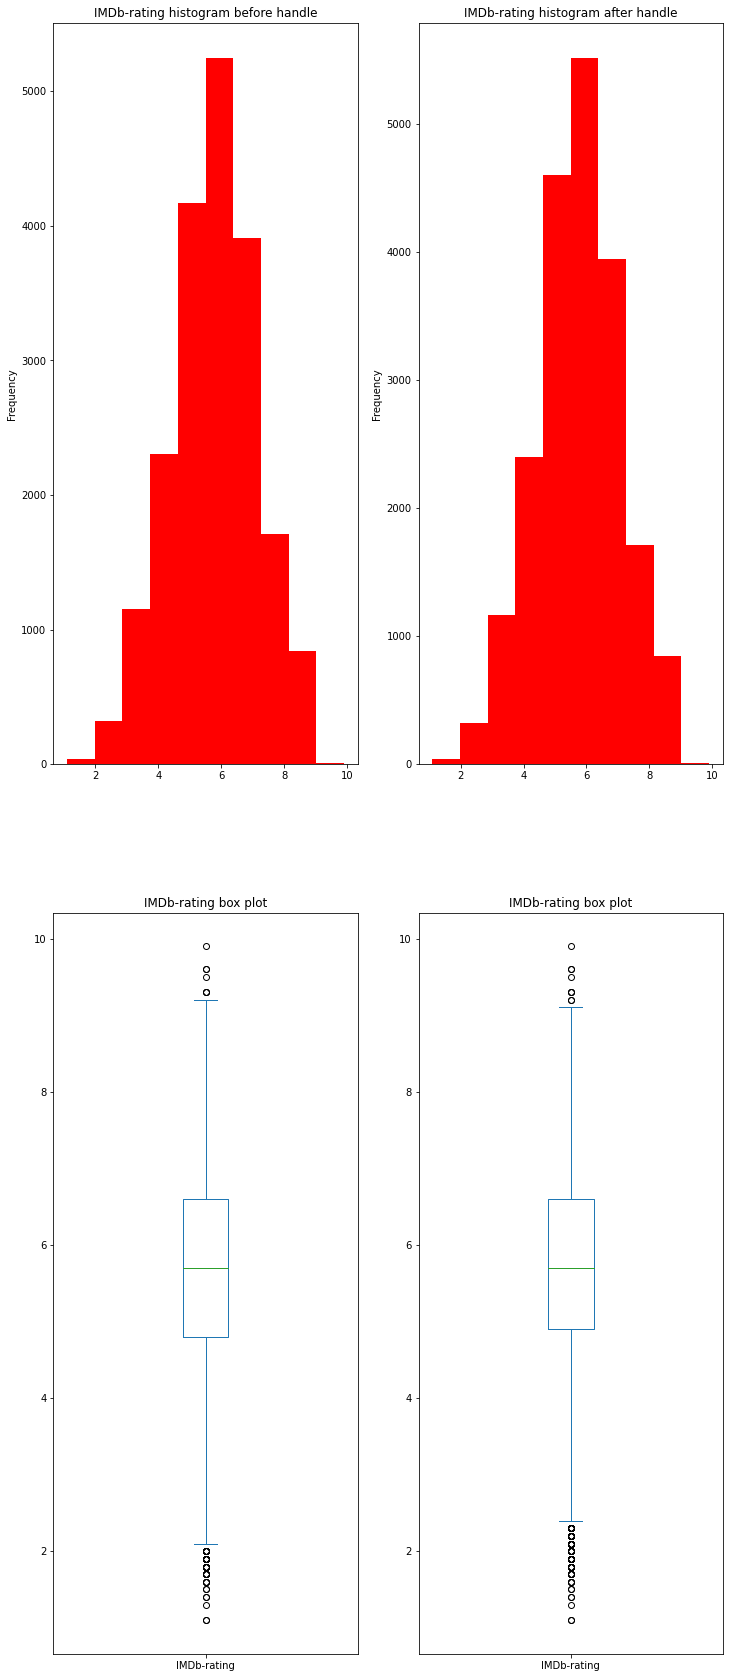

属性IMDb-rating处理前五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.8,中位数为5.7,第三四分位数为6.6,最大值为9.9
属性IMDb-rating处理后五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.8998750000000015,中位数为5.7,第三四分位数为6.6,最大值为9.9


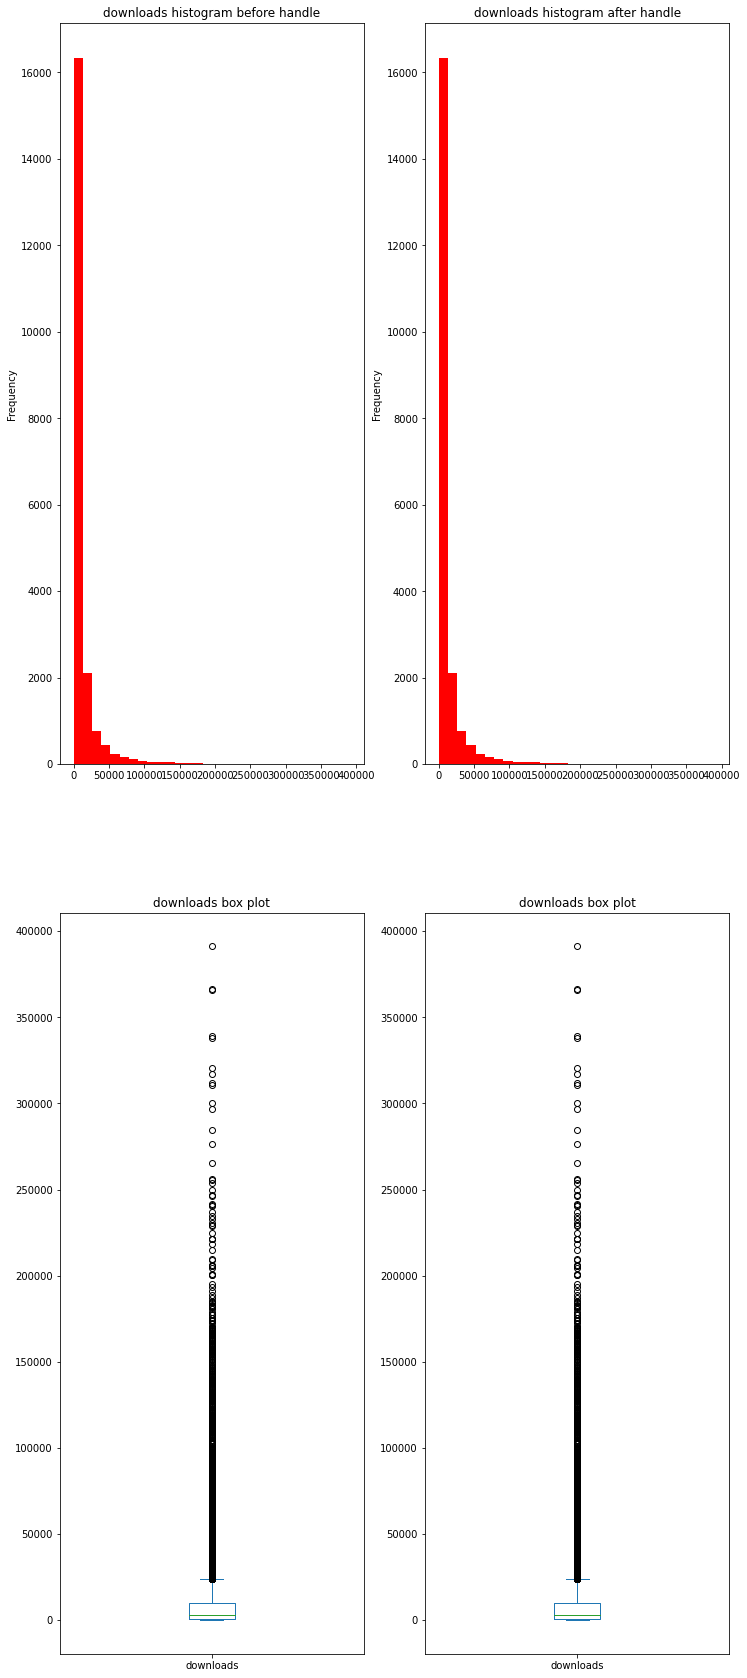

属性downloads处理前五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为855.5,中位数为2716.0,第三四分位数为10070.0,最大值为391272.0
属性downloads处理后五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为854.75,中位数为2716.0,第三四分位数为10069.5,最大值为391272.0


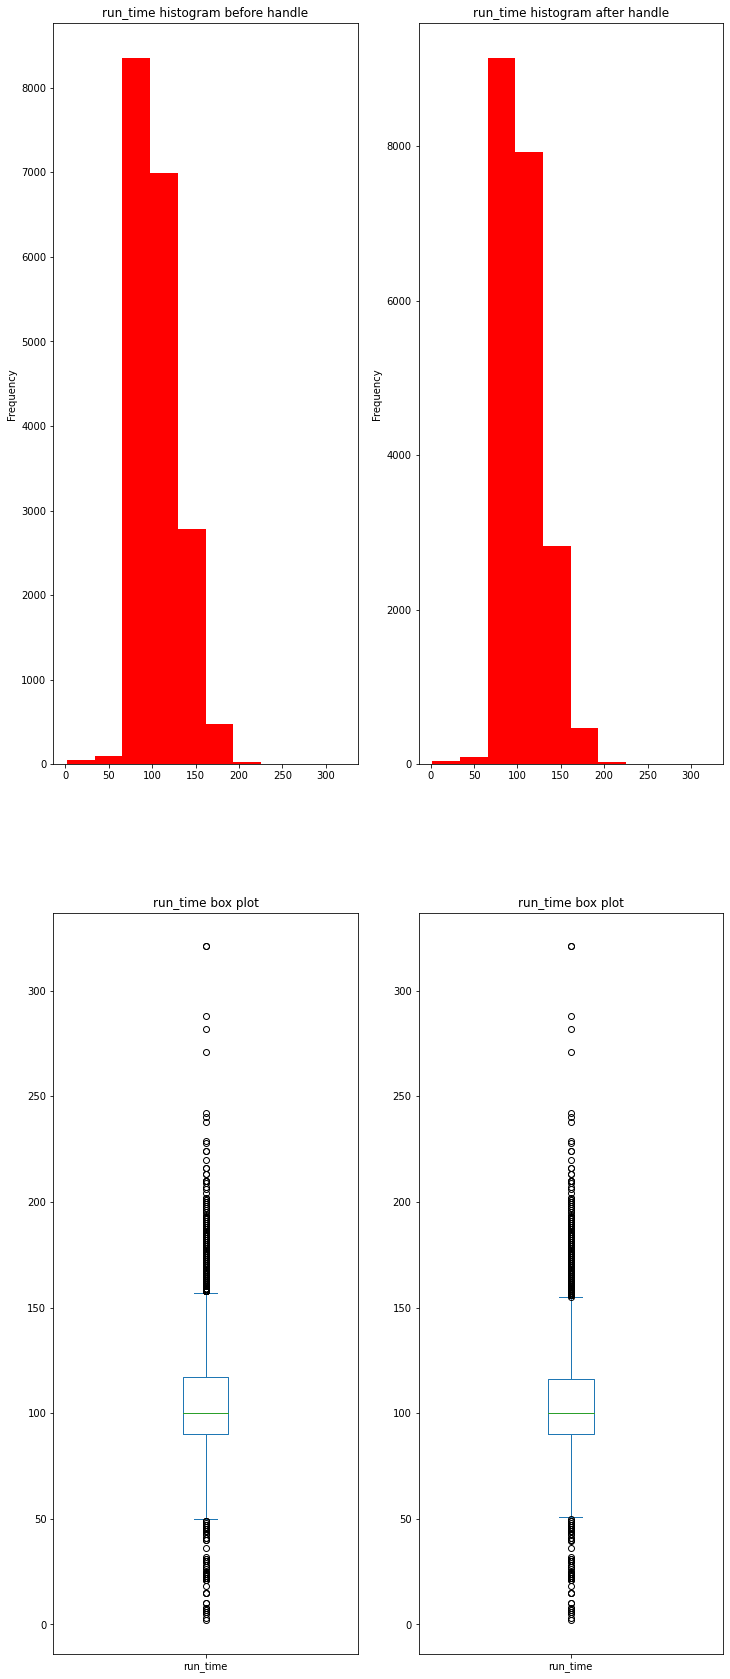

属性run_time处理前五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为100.0,第三四分位数为117.0,最大值为321.0
属性run_time处理后五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为100.0,第三四分位数为116.0,最大值为321.0


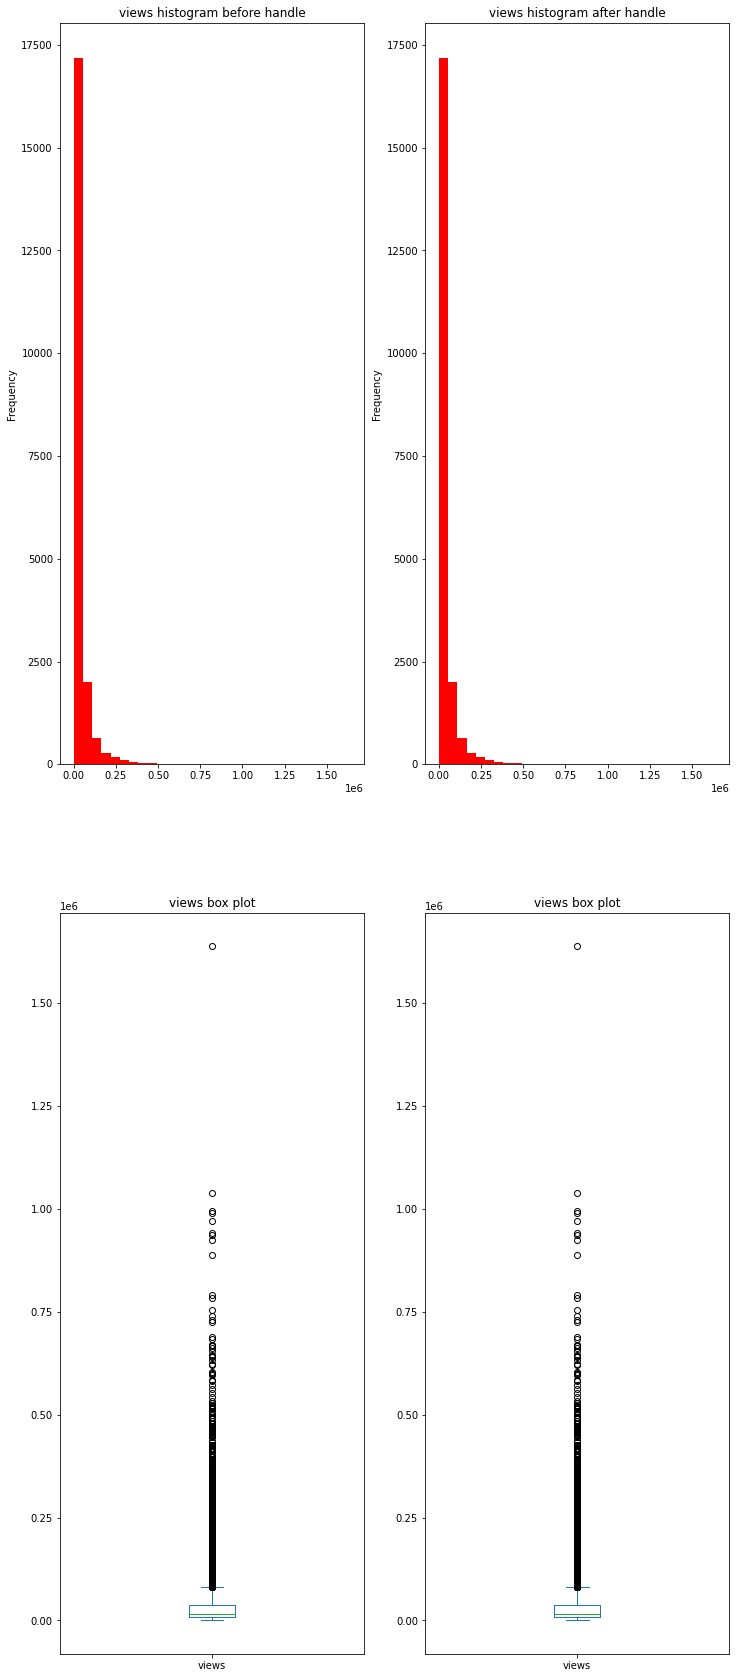

属性views处理前五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.5,中位数为15222.0,第三四分位数为36571.0,最大值为1638533.0
属性views处理后五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.0,中位数为15221.5,第三四分位数为36569.5,最大值为1638533.0


In [24]:
print("使用随机森林法填充缺失值之前:")
print(data[numetricAttr].isnull().sum())
print("使用随机森林法填充缺失值之后:")
print(new3[numetricAttr].isnull().sum())
compare_dataset_numetric(data,new3,numetricAttr,30,10,True)

可以发现采用该方法对数据进行了较好的拟合，且填补了所有缺失值，但是增加了离群点的个数

### 2.4 通过数据对象之间的相似性来填补缺失值
使用聚类算法计算数据间的相似度从而进行填充

fast_knn是一种基于KNN算法的缺失值填充方法。它使用最近邻居的值来预测缺失值。以下是fast_knn的基本原理：

对于每个缺失值，找到最近的k个非缺失值。
使用这k个非缺失值的平均值来填充缺失值。

使用FastKNN填充缺失值之前:
IMDb-rating     841
downloads         1
run_time       1768
views             1
dtype: int64
使用FastKNN填充缺失值之后:
IMDb-rating    0
downloads      0
run_time       0
views          0
dtype: int64


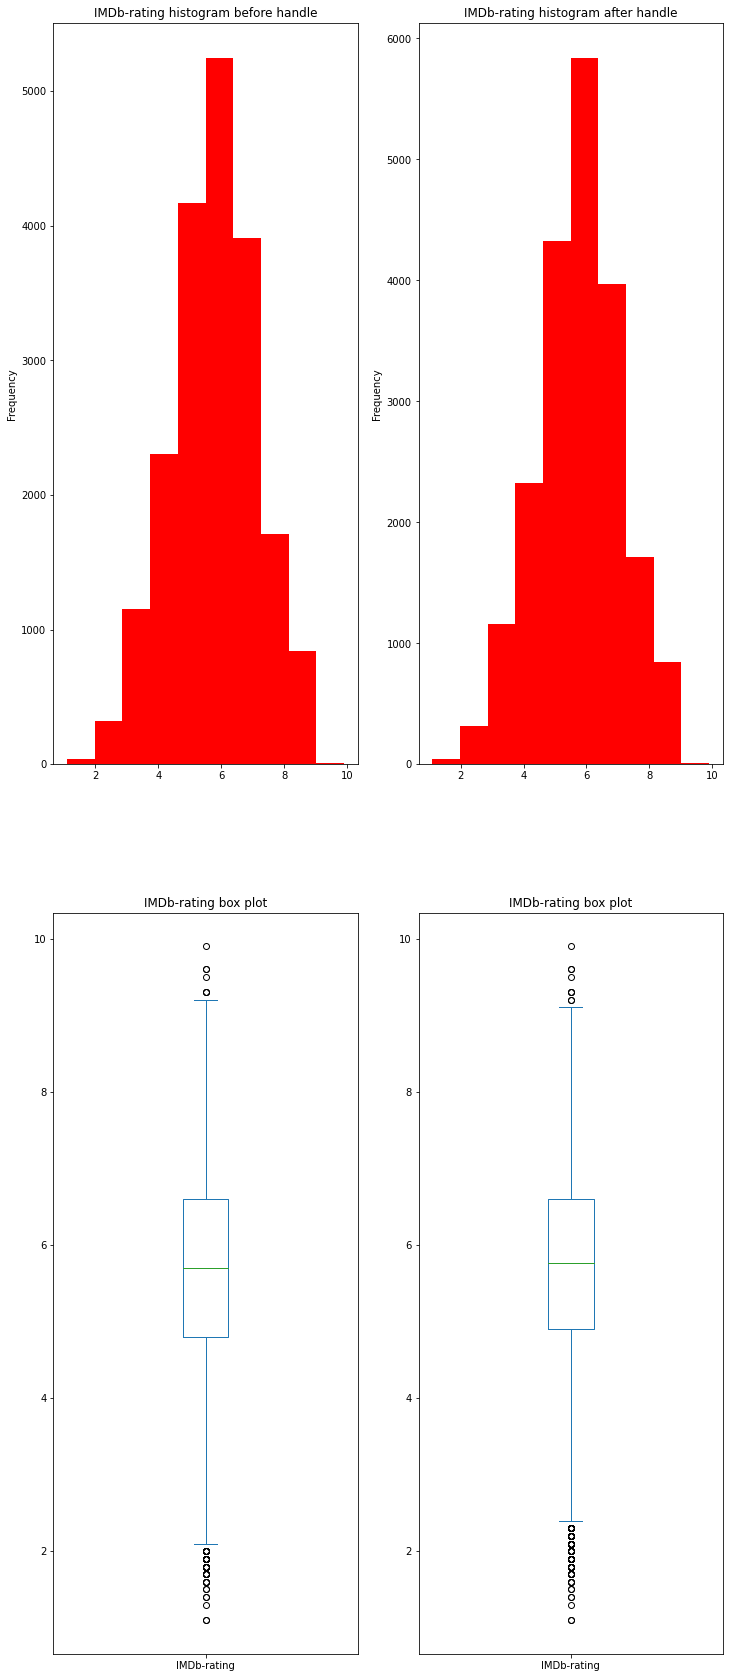

属性IMDb-rating处理前五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.8,中位数为5.7,第三四分位数为6.6,最大值为9.9
属性IMDb-rating处理后五数概括如下所示
对数值属性IMDb-rating的五数概括如下
最小值为1.1,第一四分位数为4.9,中位数为5.762150504896737,第三四分位数为6.6,最大值为9.9


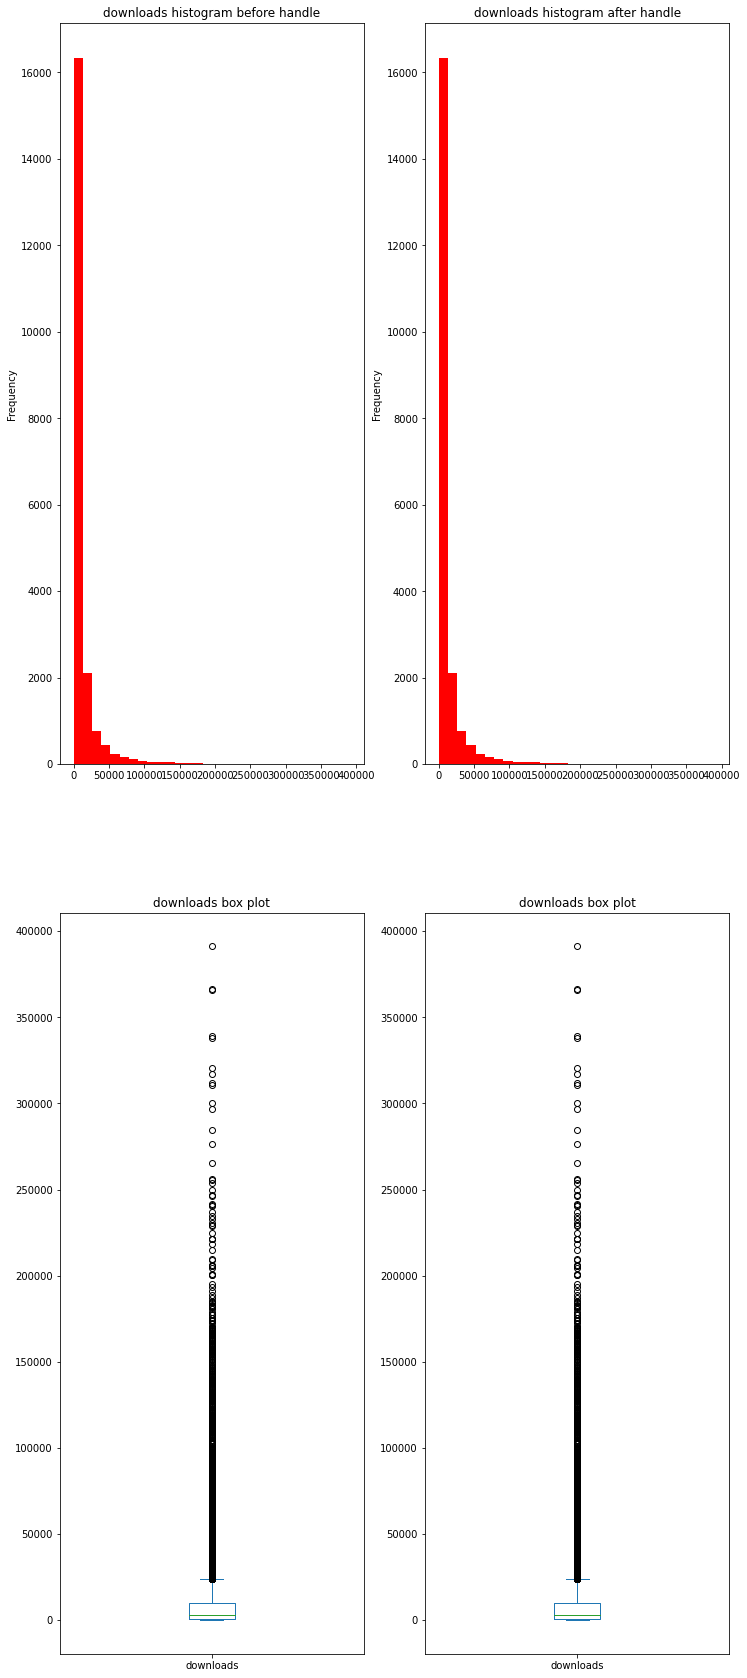

属性downloads处理前五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为855.5,中位数为2716.0,第三四分位数为10070.0,最大值为391272.0
属性downloads处理后五数概括如下所示
对数值属性downloads的五数概括如下
最小值为0.0,第一四分位数为855.75,中位数为2716.0,第三四分位数为10073.25,最大值为391272.0


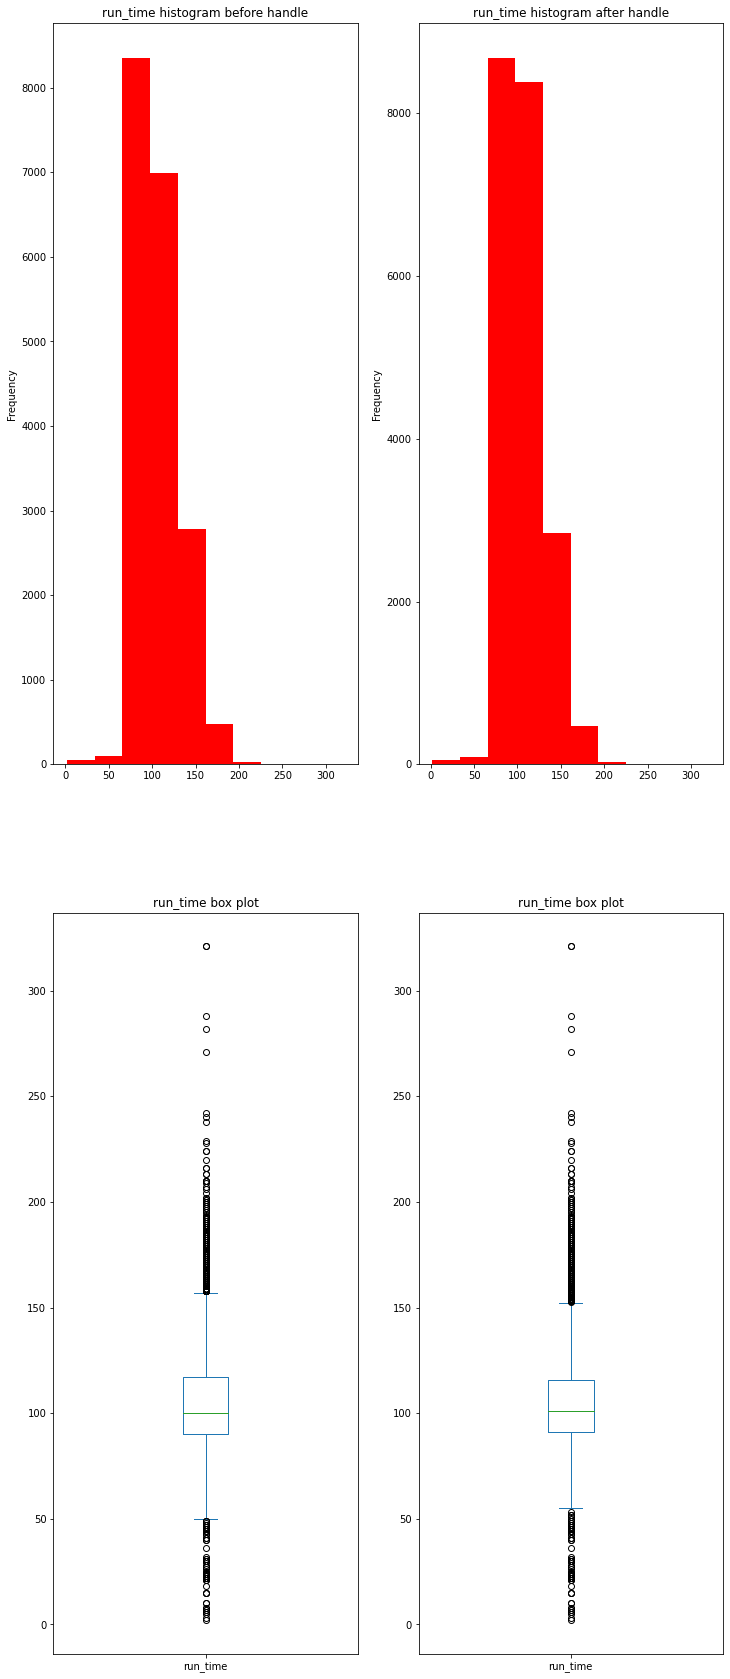

属性run_time处理前五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.0,中位数为100.0,第三四分位数为117.0,最大值为321.0
属性run_time处理后五数概括如下所示
对数值属性run_time的五数概括如下
最小值为2.0,第一四分位数为90.99212297094832,中位数为101.0,第三四分位数为115.52684514070984,最大值为321.0


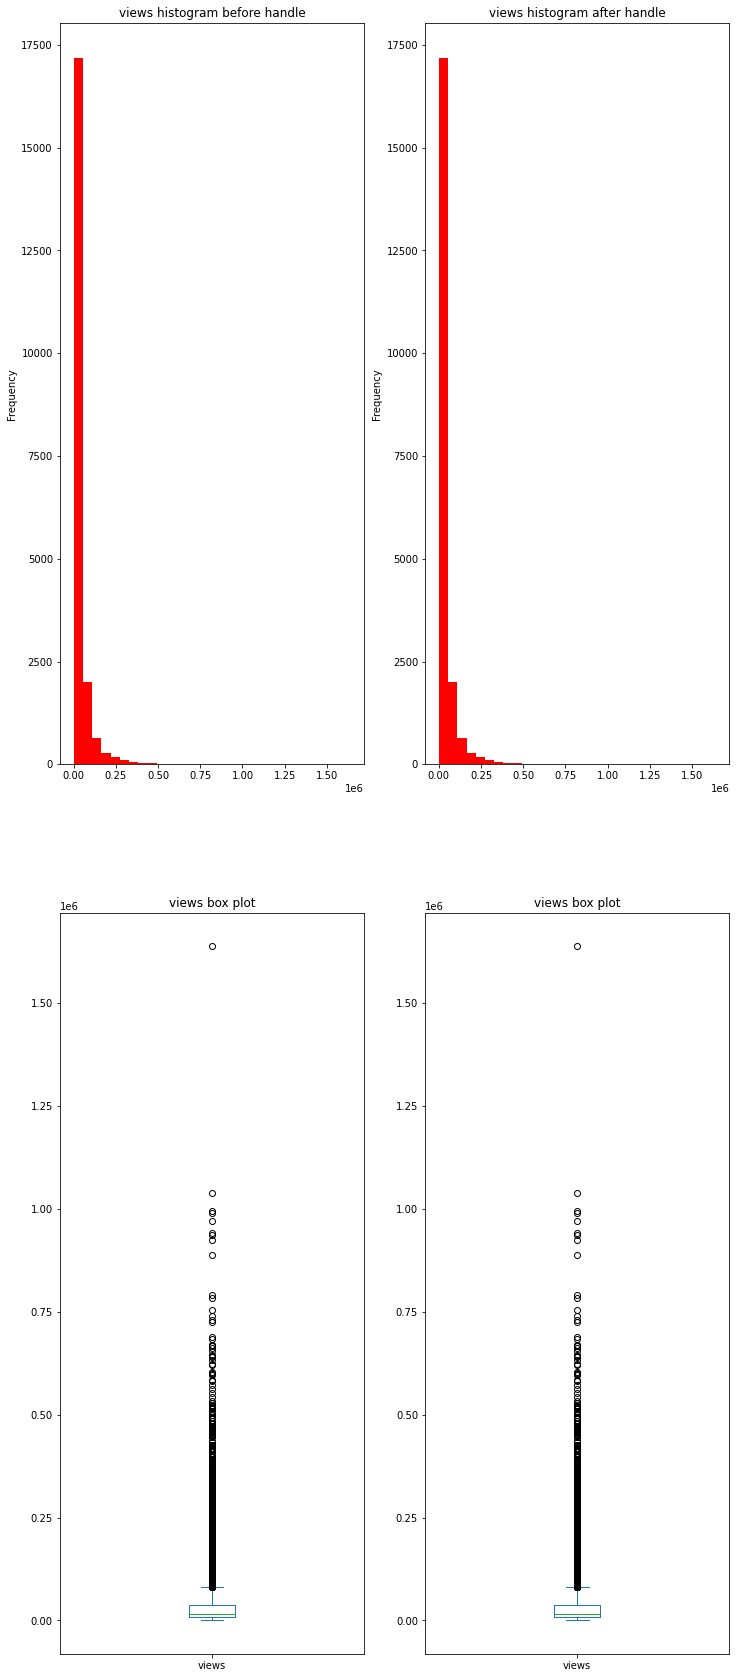

属性views处理前五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.5,中位数为15222.0,第三四分位数为36571.0,最大值为1638533.0
属性views处理后五数概括如下所示
对数值属性views的五数概括如下
最小值为667.0,第一四分位数为7571.75,中位数为15222.5,第三四分位数为36569.5,最大值为1638533.0


In [29]:
new4 = pd.DataFrame(fast_knn(data[numetricAttr].values,k=5),columns = numetricAttr)
print("使用FastKNN填充缺失值之前:")
print(data[numetricAttr].isnull().sum())
print("使用FastKNN填充缺失值之后:")
print(new4[numetricAttr].isnull().sum())
compare_dataset_numetric(data,new4,numetricAttr,30,10,True)

使用fast_knn对所有缺失值都进行了填补，增加了离群点个数